In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

In [347]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [348]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import pandas as pd
data = pd.read_csv('../DATA/SeoulBikeData_NaN.csv',encoding='cp949')
# 파일 다운로드 경로를 미리 설정해두면 이름만 써도 됨
data.head()

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8760 non-null   int64  
 1   Date                       8760 non-null   object 
 2   Rented Bike Count          8760 non-null   int64  
 3   Hour                       8760 non-null   int64  
 4   Temperature(째C)            7884 non-null   float64
 5   Humidity(%)                8760 non-null   int64  
 6   Wind speed (m/s)           7884 non-null   float64
 7   Visibility (10m)           8760 non-null   int64  
 8   Dew point temperature(째C)  8760 non-null   float64
 9   Solar Radiation (MJ/m2)    8760 non-null   float64
 10  Rainfall(mm)               8760 non-null   float64
 11  Snowfall (cm)              8760 non-null   float64
 12  Seasons                    7884 non-null   object 
 13  Holiday                    8760 non-null   objec

Unnamed: 0                     0
Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              876
Humidity(%)                    0
Wind speed (m/s)             876
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      876
Holiday                        0
Functioning Day                0
dtype: int64

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


<Axes: >

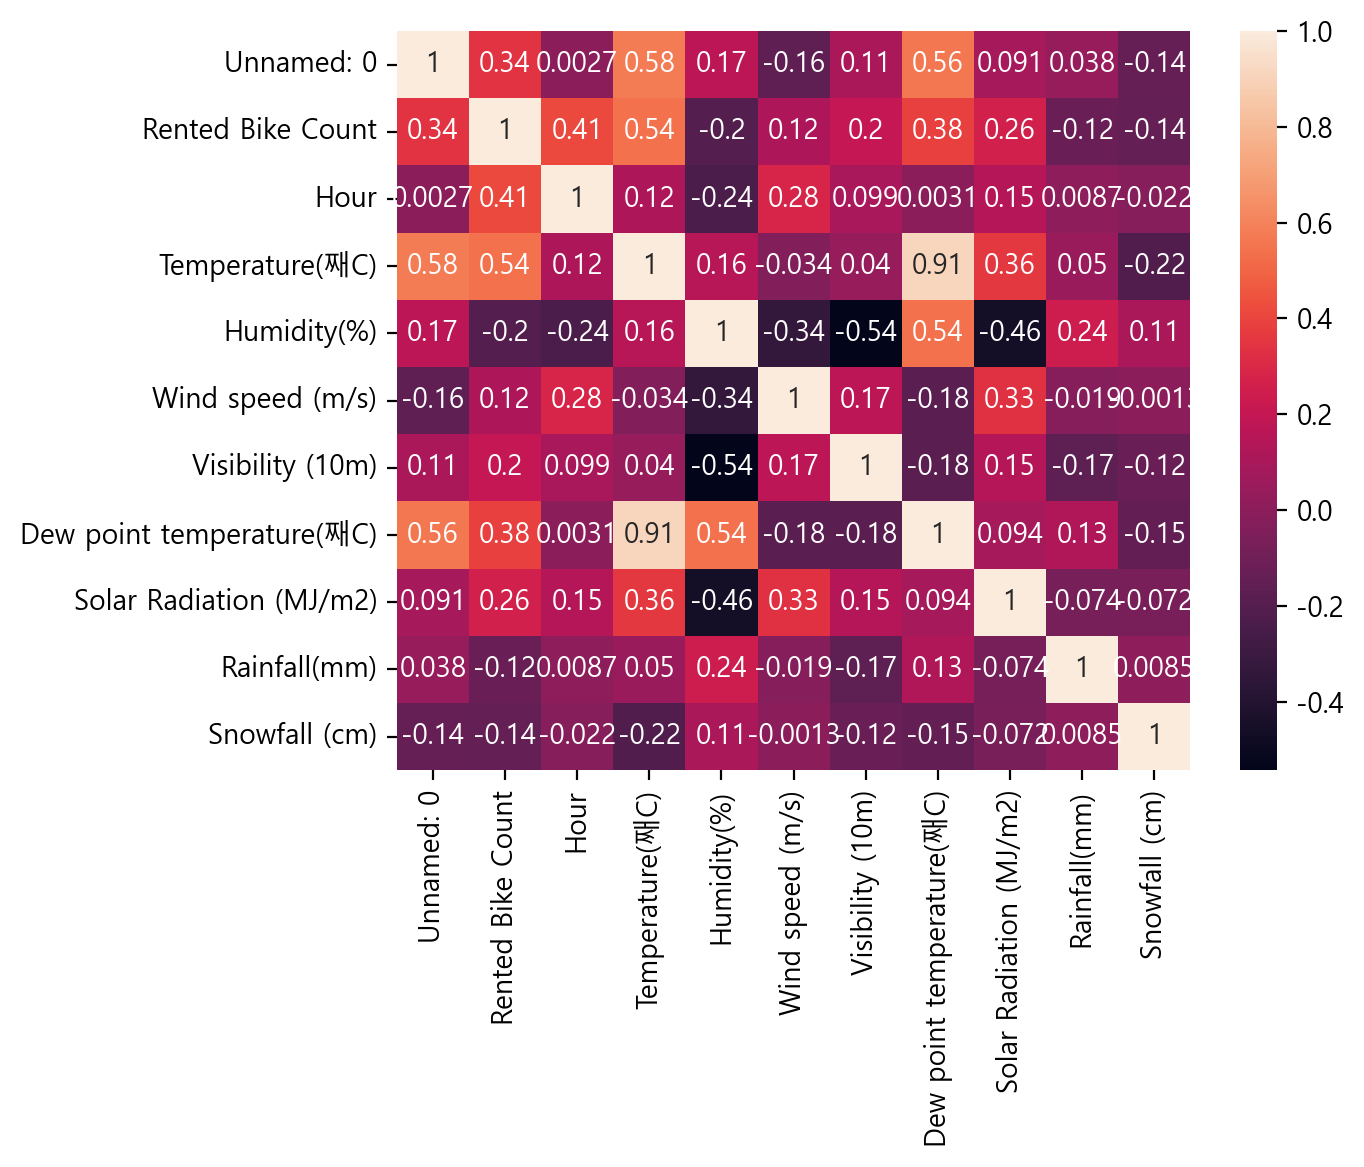

In [349]:
data.info() # 정보 확인
data.isna().sum() # 결측치 - 온도 풍속 계절 
data[data.duplicated()] #중복행 확인
data_x=data._get_numeric_data()
sns.heatmap(data_x.corr(),annot=True)


In [350]:
data.columns
data.info()

Index(['Unnamed: 0', 'Date', 'Rented Bike Count', 'Hour', 'Temperature(째C)',
       'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(째C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8760 non-null   int64  
 1   Date                       8760 non-null   object 
 2   Rented Bike Count          8760 non-null   int64  
 3   Hour                       8760 non-null   int64  
 4   Temperature(째C)            7884 non-null   float64
 5   Humidity(%)                8760 non-null   int64  
 6   Wind speed (m/s)           7884 non-null   float64
 7   Visibility (10m)           8760 non-null   int64  
 8   Dew point temperature(째C)  8760 non-null   float64
 9   Solar Radiation (MJ/m2)    8760 non-null   float64
 10  Rainfall(mm)               8760 non-null   float64
 11  Snowfall (cm)              8760 non-null   float64
 12  Seasons                    7884 non-null   object 
 13  Holiday                    8760 non-null   objec

In [351]:
# 열이름 한눈에 알아보기 쉽게 재설정
data.rename(columns={'Date':'날짜', 'Rented Bike Count':'대여횟수', 'Hour':'시', 'Temperature(째C)':'온도', 'Humidity(%)':'습도',
       'Wind speed (m/s)':'풍속', 'Visibility (10m)':'가시성', 'Dew point temperature(째C)':'이슬점',
       'Solar Radiation (MJ/m2)':'태양 복사에너지', 'Rainfall(mm)':'강수량', 'Snowfall (cm)':'강설량', 'Seasons':'계절',
       'Holiday':'휴무일여부', 'Functioning Day':'작동여부'}, inplace=True)

### 결측치 처리 : 온도 풍속 계절

In [352]:
df=data.copy()
# df.iloc[:,1:]

In [353]:
df.head()
df.shape
df= df.iloc[:,1:] # 1열 삭제

,Unnamed: 0,날짜,대여횟수,시,온도,습도,풍속,가시성,이슬점,태양 복사에너지,강수량,강설량,계절,휴무일여부,작동여부
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


(8760, 15)

In [354]:
df.head()

,날짜,대여횟수,시,온도,습도,풍속,가시성,이슬점,태양 복사에너지,강수량,강설량,계절,휴무일여부,작동여부
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## 날짜 형식으로 변환 date형태

In [355]:
df['날짜'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: 날짜
Non-Null Count  Dtype 
--------------  ----- 
8760 non-null   object
dtypes: object(1)
memory usage: 68.6+ KB


In [356]:
df['날짜']=pd.to_datetime(df['날짜'], format='%d/%m/%Y')

In [357]:
# 계절 결측치 처리
# 입춘 입하 입추 입동 기준으로 처리 
df['날짜'].describe()
df['계절'].isnull().sum()

count                             8760
mean     2018-05-31 23:59:59.999999744
min                2017-12-01 00:00:00
25%                2018-03-02 00:00:00
50%                2018-06-01 00:00:00
75%                2018-08-31 00:00:00
max                2018-11-30 00:00:00
Name: 날짜, dtype: object

876

In [358]:
weather_df=df[df[['계절']].isnull().all(axis=1)]

In [359]:
weather_df.head()
weather_df.shape

,날짜,대여횟수,시,온도,습도,풍속,가시성,이슬점,태양 복사에너지,강수량,강설량,계절,휴무일여부,작동여부
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,NaN,No Holiday,Yes
20,2017-12-01,426,20,-0.3,79,1.5,1913,-3.5,0.00,0.0,0.0,NaN,No Holiday,Yes
31,2017-12-02,146,7,-4.4,81,2.5,1276,-7.1,0.00,0.0,0.0,NaN,No Holiday,Yes
32,2017-12-02,219,8,-4.2,79,2.1,1436,-7.3,0.01,0.0,0.0,NaN,No Holiday,Yes
36,2017-12-02,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,NaN,No Holiday,Yes


(876, 14)

In [360]:
# 날짜 구간 나누기
winter_df= (df['날짜'] >= '2017-12-21') & (df['날짜'] < '2018-02-04')
spring_df = (df['날짜'] >= '2018-02-04') & (df['날짜'] < '2018-06-21')
summer_df = (df['날짜'] >= '2018-06-21') & (df['날짜'] < '2018-08-07')
autumn_df = (df['날짜'] >= '2018-08-07') & (df['날짜'] < '2017-12-21')


In [361]:
df['날짜']

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: 날짜, Length: 8760, dtype: datetime64[ns]

In [362]:
if (winter_df).any():
    df['계절'].fillna('Winter', inplace=True)
elif (spring_df).any():
    df['계절'].fillna('Spring', inplace=True)
elif (summer_df).any():
    df['계절'].fillna('Summer', inplace=True)
elif (autumn_df).any():
    df['계절'].fillna('Autumn', inplace=True)

In [363]:
df['계절'].isna().sum()

0

In [364]:
df.isna().sum()

날짜            0
대여횟수          0
시             0
온도          876
습도            0
풍속          876
가시성           0
이슬점           0
태양 복사에너지      0
강수량           0
강설량           0
계절            0
휴무일여부         0
작동여부          0
dtype: int64

### 온도 결측치 처리

876

(array([ 20.,  37.,  46.,  93.,  91., 170., 234., 228., 256., 326., 393.,
        351., 367., 358., 372., 404., 320., 345., 420., 493., 518., 451.,
        401., 373., 318., 187., 147., 102.,  52.,  11.]),
 array([-17.8       , -15.89333333, -13.98666667, -12.08      ,
        -10.17333333,  -8.26666667,  -6.36      ,  -4.45333333,
         -2.54666667,  -0.64      ,   1.26666667,   3.17333333,
          5.08      ,   6.98666667,   8.89333333,  10.8       ,
         12.70666667,  14.61333333,  16.52      ,  18.42666667,
         20.33333333,  22.24      ,  24.14666667,  26.05333333,
         27.96      ,  29.86666667,  31.77333333,  33.68      ,
         35.58666667,  37.49333333,  39.4       ]),
 <BarContainer object of 30 artists>)

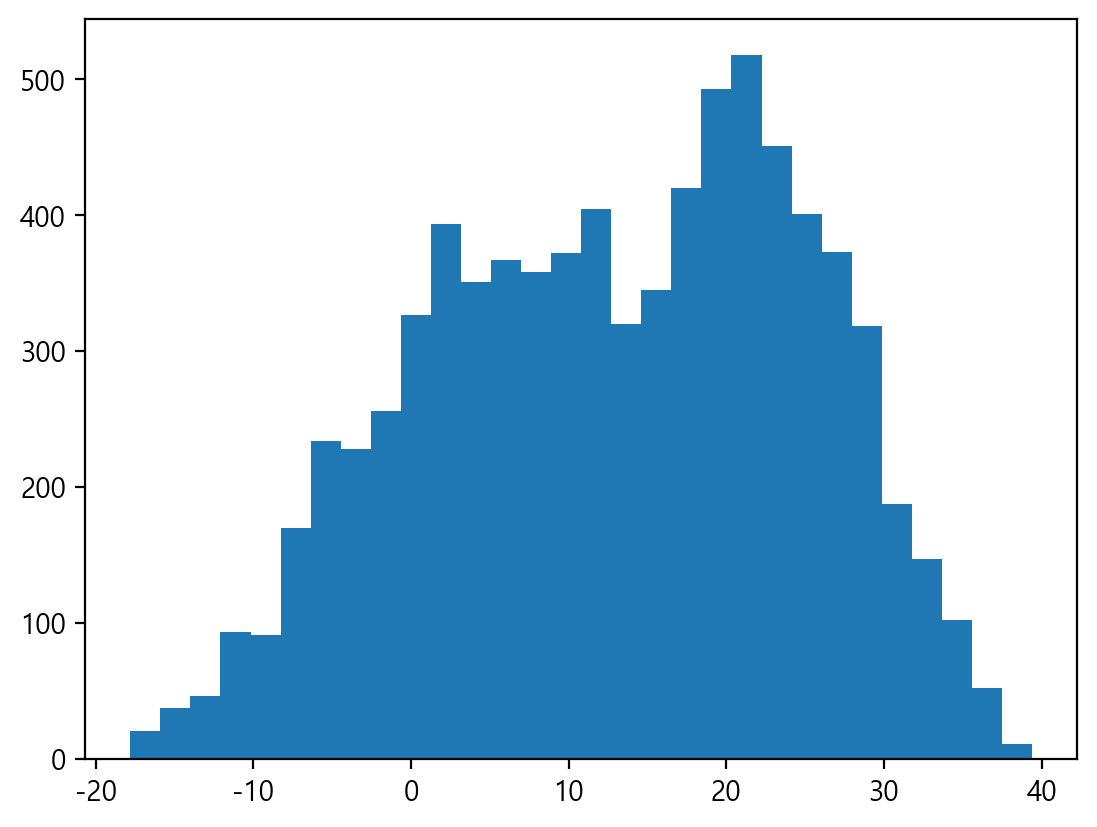

In [365]:
# 온도 결측치 처리
# 계절에 따라 평균온도를 구해서 결측치 처리
# 결측치 처리 전 분포
df['온도'].isnull().sum()
plt.hist(df['온도'], bins=30)

In [366]:
df_tem=df.copy()

In [367]:
tem_season_df=pd.DataFrame(df.groupby(['계절'])['온도'].mean())
x=tem_season_df.values.flatten().tolist()
x
round(x[3],2)

[14.128140989198409, 13.085992217898832, 26.64928414096916, 2.355258964143426]

2.36

In [368]:
if (df['계절']=='Autumn').any():
    df_tem['온도'].fillna(round(x[0],2), inplace=True)
elif (df['계절']=='Spring').any():
    df_tem['온도'].fillna(round(x[1],2), inplace=True)
elif (df['계절']=='Summer').any():
    df_tem['온도'].fillna(round(x[2],2), inplace=True)
elif (df['계절']=='Winter').any():
    df_tem['온도'].fillna(round(x[3],2), inplace=True)

0

(array([  20.,   37.,   46.,   93.,   91.,  170.,  234.,  228.,  256.,
         326.,  393.,  351.,  367.,  358.,  372.,  404., 1196.,  345.,
         420.,  493.,  518.,  451.,  401.,  373.,  318.,  187.,  147.,
         102.,   52.,   11.]),
 array([-17.8       , -15.89333333, -13.98666667, -12.08      ,
        -10.17333333,  -8.26666667,  -6.36      ,  -4.45333333,
         -2.54666667,  -0.64      ,   1.26666667,   3.17333333,
          5.08      ,   6.98666667,   8.89333333,  10.8       ,
         12.70666667,  14.61333333,  16.52      ,  18.42666667,
         20.33333333,  22.24      ,  24.14666667,  26.05333333,
         27.96      ,  29.86666667,  31.77333333,  33.68      ,
         35.58666667,  37.49333333,  39.4       ]),
 <BarContainer object of 30 artists>)

,온도
계절,
Autumn,14.128339
Spring,13.186196
Summer,25.554633
Winter,3.616090


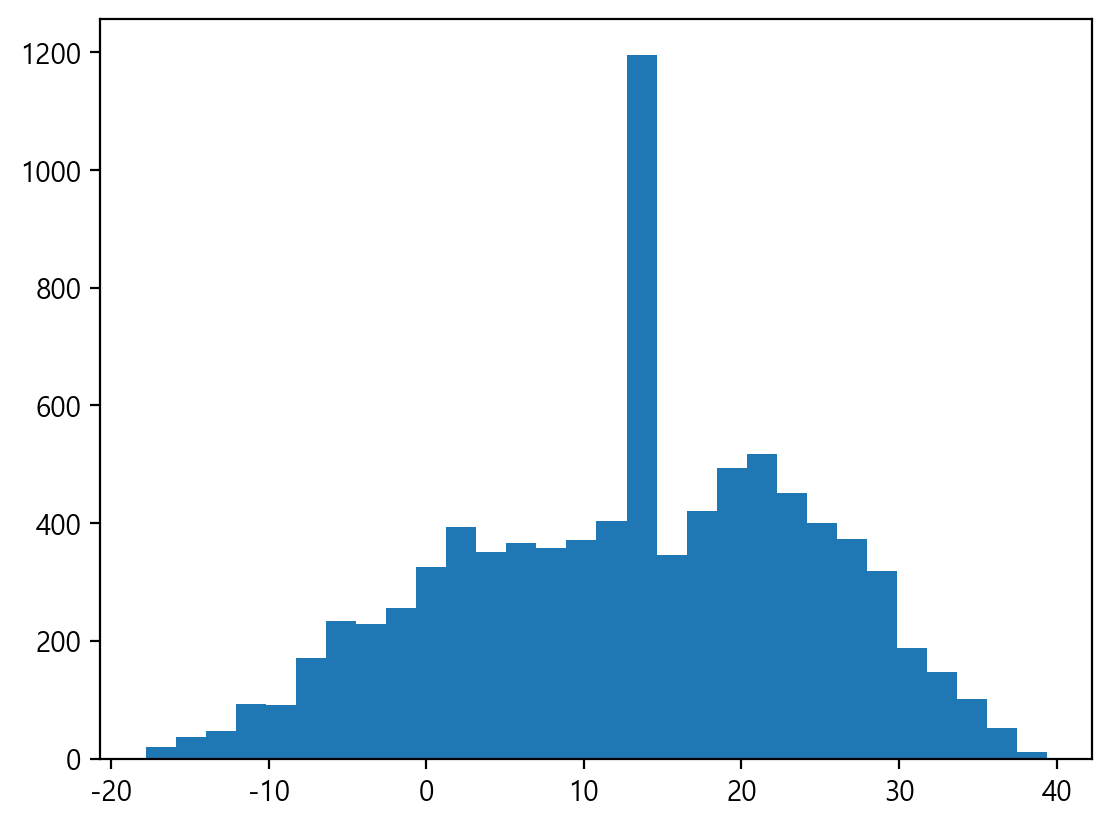

In [369]:
df_tem['온도'].isnull().sum()
plt.hist(df_tem['온도'], bins=30)
pd.DataFrame(df_tem.groupby(['계절'])['온도'].mean())


In [370]:
df_tem.isna().sum()

날짜            0
대여횟수          0
시             0
온도            0
습도            0
풍속          876
가시성           0
이슬점           0
태양 복사에너지      0
강수량           0
강설량           0
계절            0
휴무일여부         0
작동여부          0
dtype: int64

### 풍속 결측치 처리

876

(array([1.910e+02, 3.040e+02, 8.060e+02, 6.890e+02, 1.095e+03, 6.240e+02,
        8.870e+02, 4.600e+02, 6.690e+02, 3.730e+02, 4.680e+02, 2.720e+02,
        3.220e+02, 1.710e+02, 1.240e+02, 1.540e+02, 8.100e+01, 6.700e+01,
        4.100e+01, 4.500e+01, 1.700e+01, 1.000e+01, 1.000e+00, 5.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 3.000e+00]),
 array([0.        , 0.24666667, 0.49333333, 0.74      , 0.98666667,
        1.23333333, 1.48      , 1.72666667, 1.97333333, 2.22      ,
        2.46666667, 2.71333333, 2.96      , 3.20666667, 3.45333333,
        3.7       , 3.94666667, 4.19333333, 4.44      , 4.68666667,
        4.93333333, 5.18      , 5.42666667, 5.67333333, 5.92      ,
        6.16666667, 6.41333333, 6.66      , 6.90666667, 7.15333333,
        7.4       ]),
 <BarContainer object of 30 artists>)

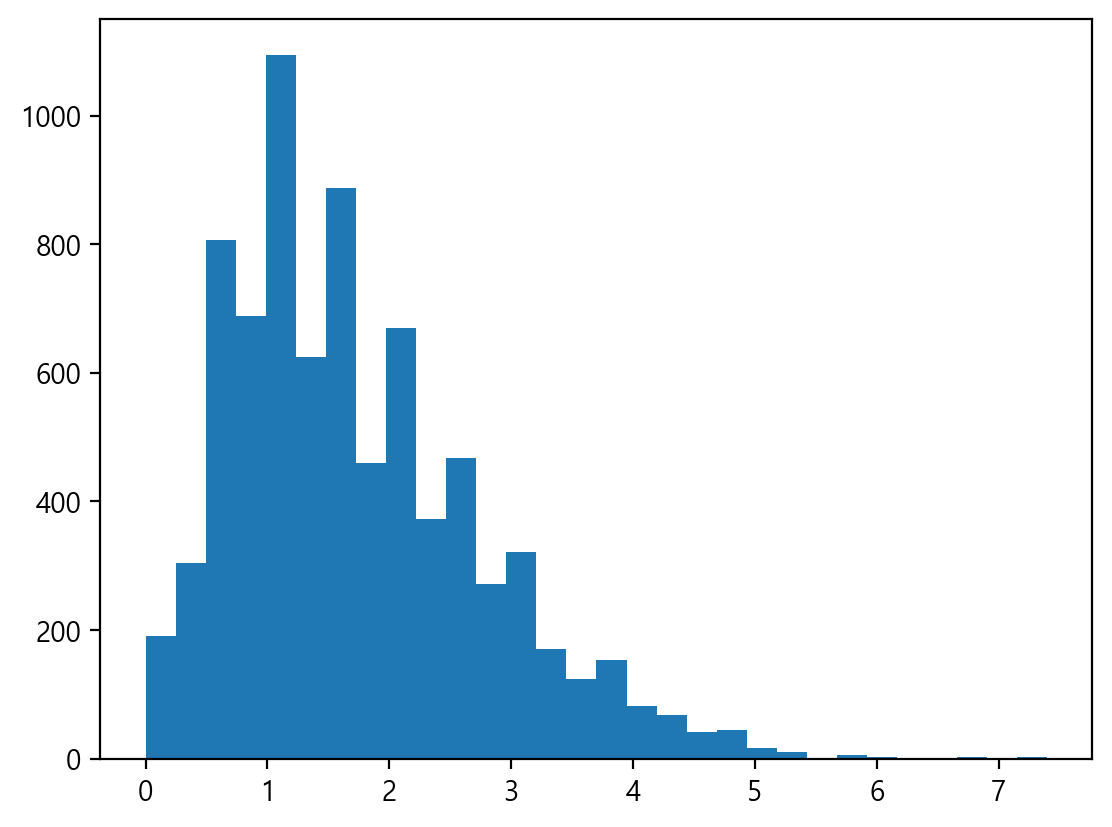

In [371]:
# 풍속 결측치 처리

# 결측치 처리 전 분포
df_tem['풍속'].isnull().sum()
plt.hist(df_tem['풍속'], bins=30)

<Axes: >

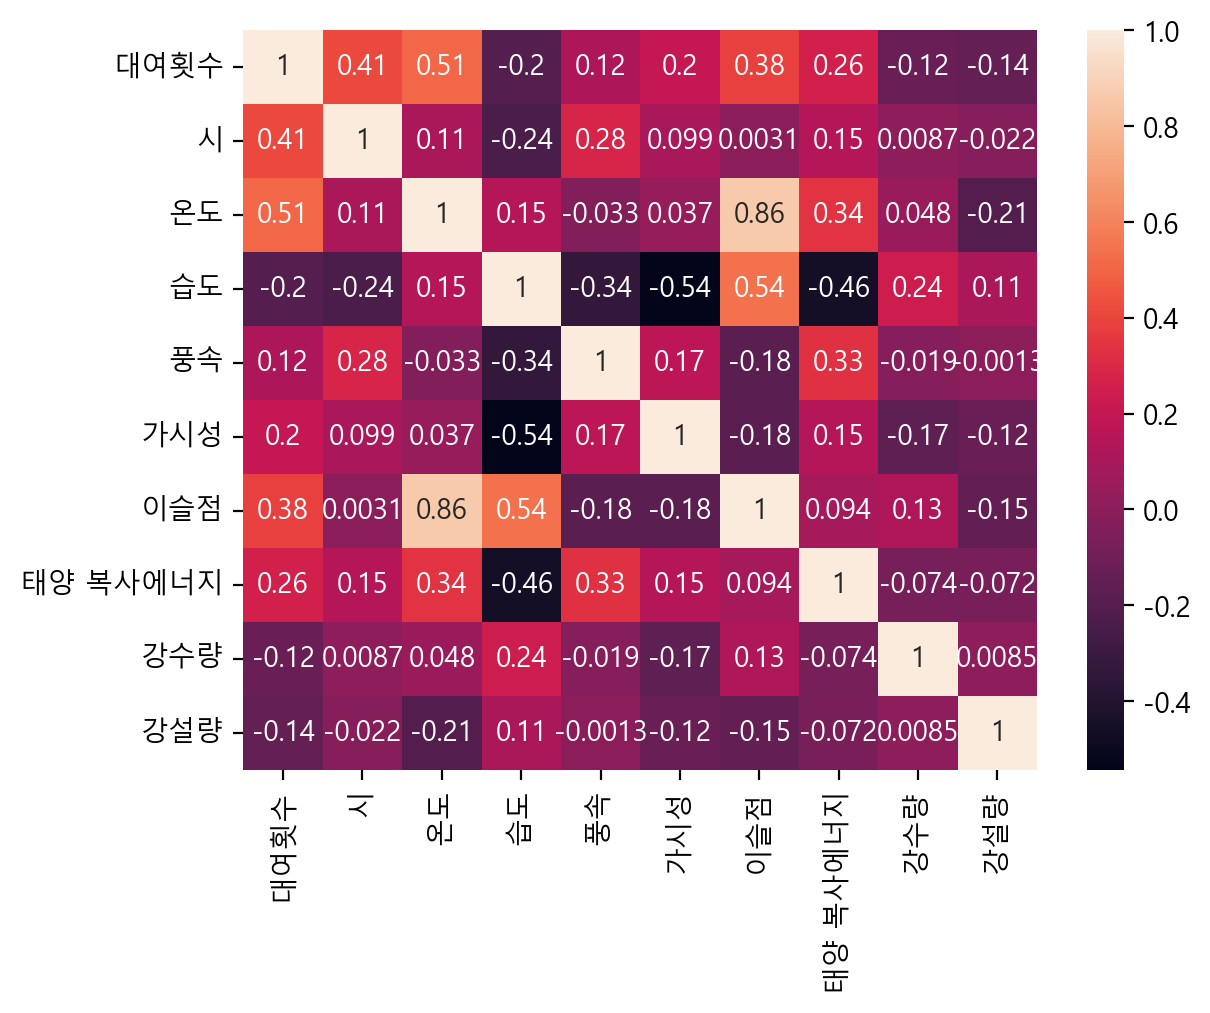

In [372]:
df_num=df_tem._get_numeric_data()
sns.heatmap(df_num.corr(),annot=True)
# 딱히 크게 관련있는 변수가 없는듯하다 
# 그래도 풍속과 시 비교

In [375]:
pd.DataFrame(df.groupby(['시'])['풍속'].mean())

,풍속
시,
0,1.446106
1,1.297546
2,1.226647
3,1.197806
4,1.232710
5,1.136795
6,1.107903
7,1.197554
8,1.294578


count    7884.000000
mean        1.727220
std         1.036138
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: 풍속, dtype: float64

1.5

0    1.1
Name: 풍속, dtype: float64

<Axes: xlabel='풍속', ylabel='Count'>

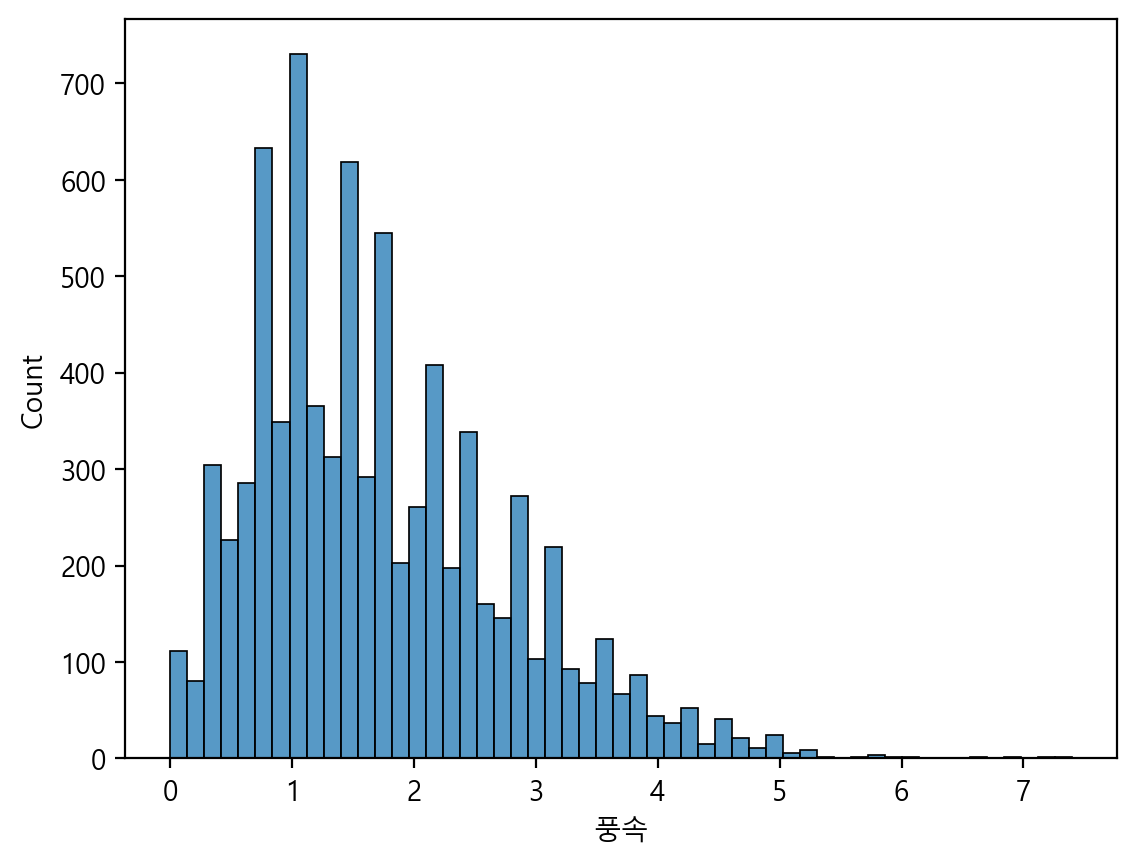

<Axes: >

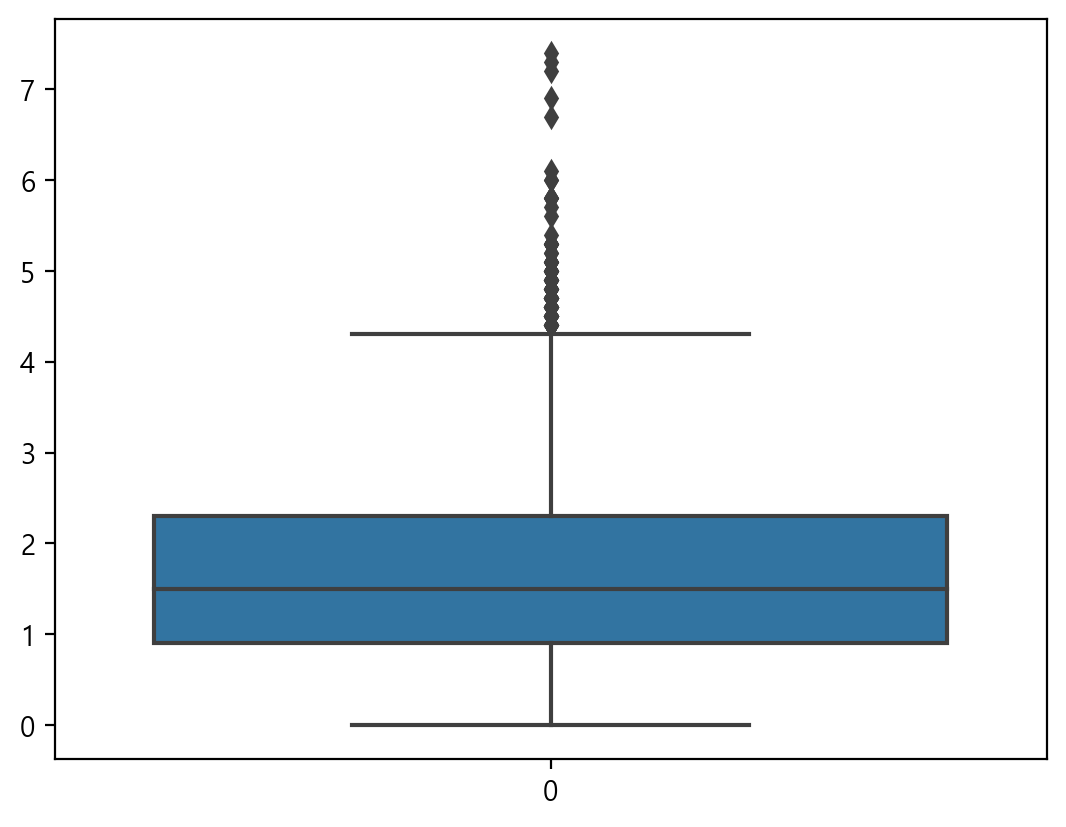

In [376]:
df_num['풍속'].describe()
df_num['풍속'].median()
df_num['풍속'].mode()
sns.histplot(df_num['풍속'])
plt.show()
sns.boxplot(df_num['풍속'])
# 오른쪽 꼬리 분포이며 최빈값, 중앙값, 평균 모두 1점대이기 때문에 
# 평균을 활용하여 대체하겠다.
df_final=df_num.fillna(df_num['풍속'].mean())


In [377]:
df_final.isna().sum()
# 결측치 처리 완료

대여횟수        0
시           0
온도          0
습도          0
풍속          0
가시성         0
이슬점         0
태양 복사에너지    0
강수량         0
강설량         0
dtype: int64

## 수치형 데이터의 분포 확인

### 편향 데이터셋에 할 수 있는 전처리(이상치가 많은 분포)
- 스케일링, minmax 스케일링, 로그변환을 통해 정규분포에 가깝게 만듦
- 이후 이상치를 재확인(산포도)
- 확인 후 이상치의 상태를 보고 의도된 것인지, 자연적인 것인지, 오류인지 확인 후 삭제 or 보존



##### 이상치가 미치는 영향
- 오차 분산을 증가시키고 통계 검정의 검정력을 감소시킨다.
- 이상값이 무작위로 분포되지 않으면 정규성이 감소 할 수 있다.
- 그들은 실질적인 관심이 있을 수있는 추정치를 편향 시키거나 영향을 줄 수 있다
- 또한 회귀, 분산 분석 및 기타 통계 모델 가정의 기본 가정에 영향을 줄 수 있다.

In [378]:
# 숫자형 데이터의 기본 통계값 확인 - object가 아닌 것들
x_df = df_final.select_dtypes(include=['object']).columns
new_df = df_final.drop(columns=x_df)
new_df.shape

(8760, 10)

<Axes: >

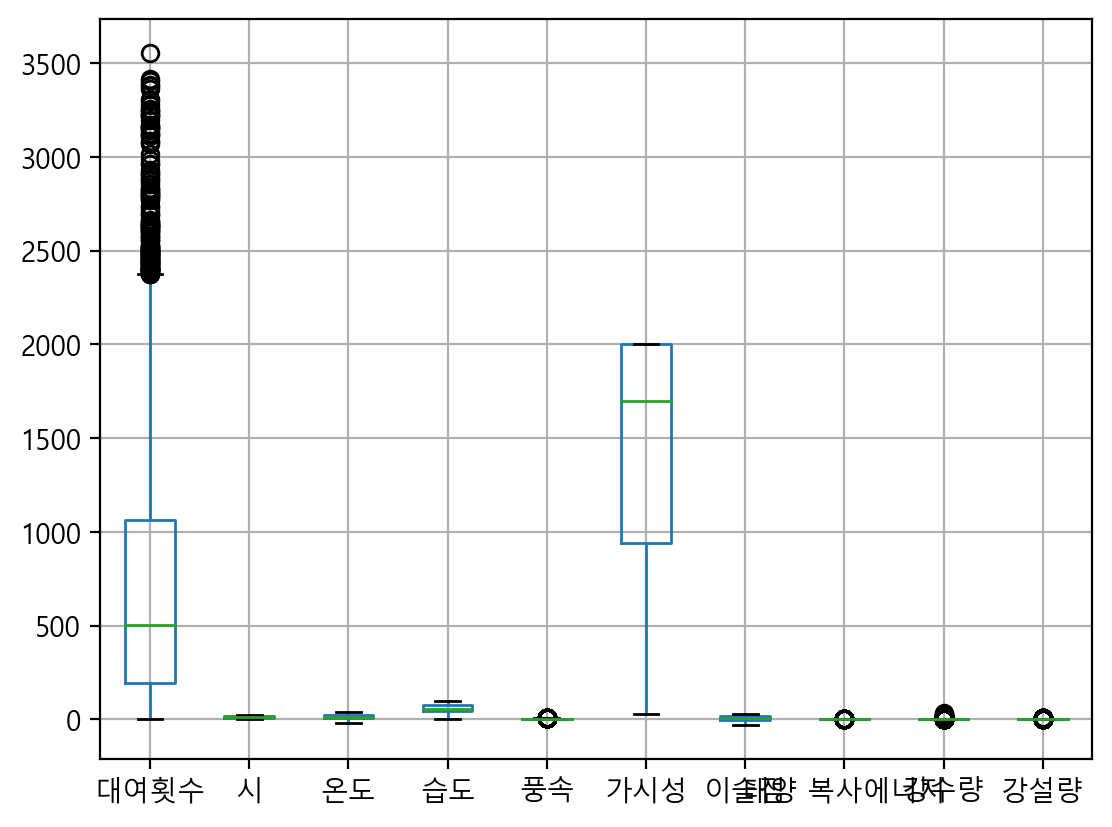

<Axes: ylabel='Count'>

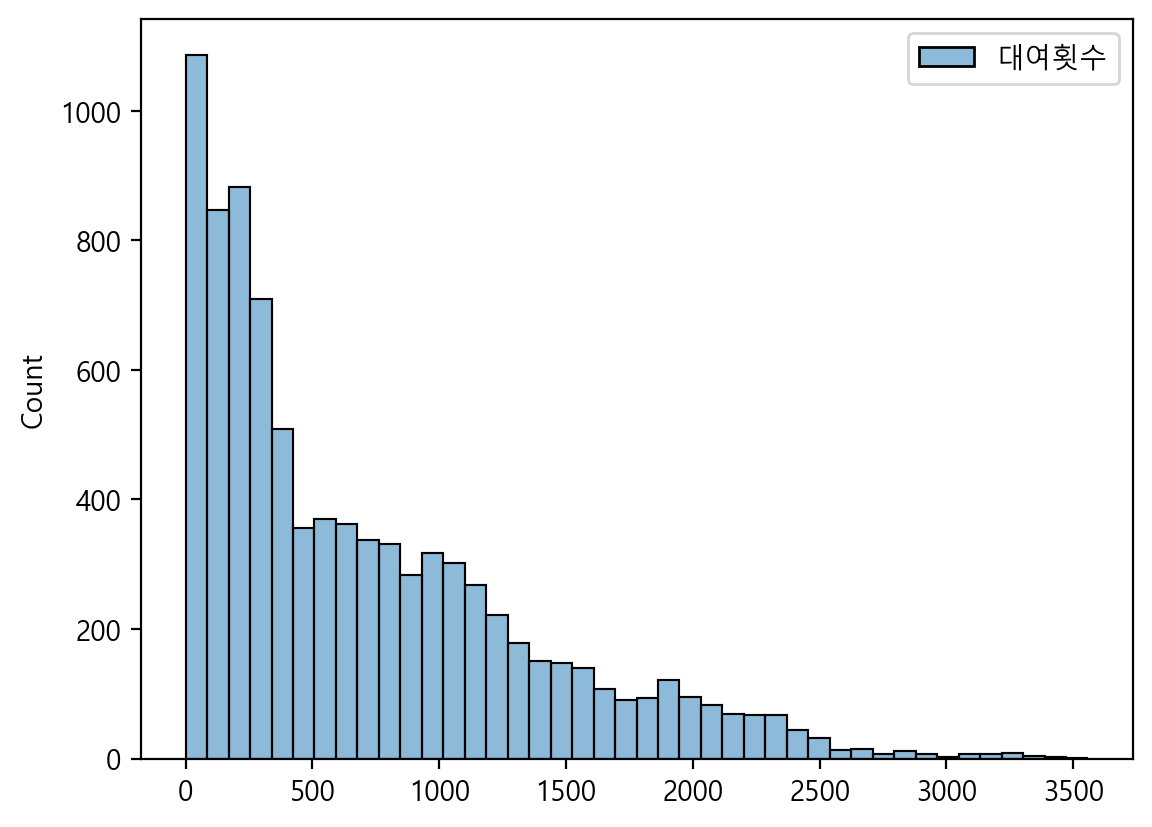

count    8760.000000
mean     1436.825799
std       608.298712
min        27.000000
25%       940.000000
50%      1698.000000
75%      2000.000000
max      2000.000000
Name: 가시성, dtype: float64

<Axes: ylabel='Count'>

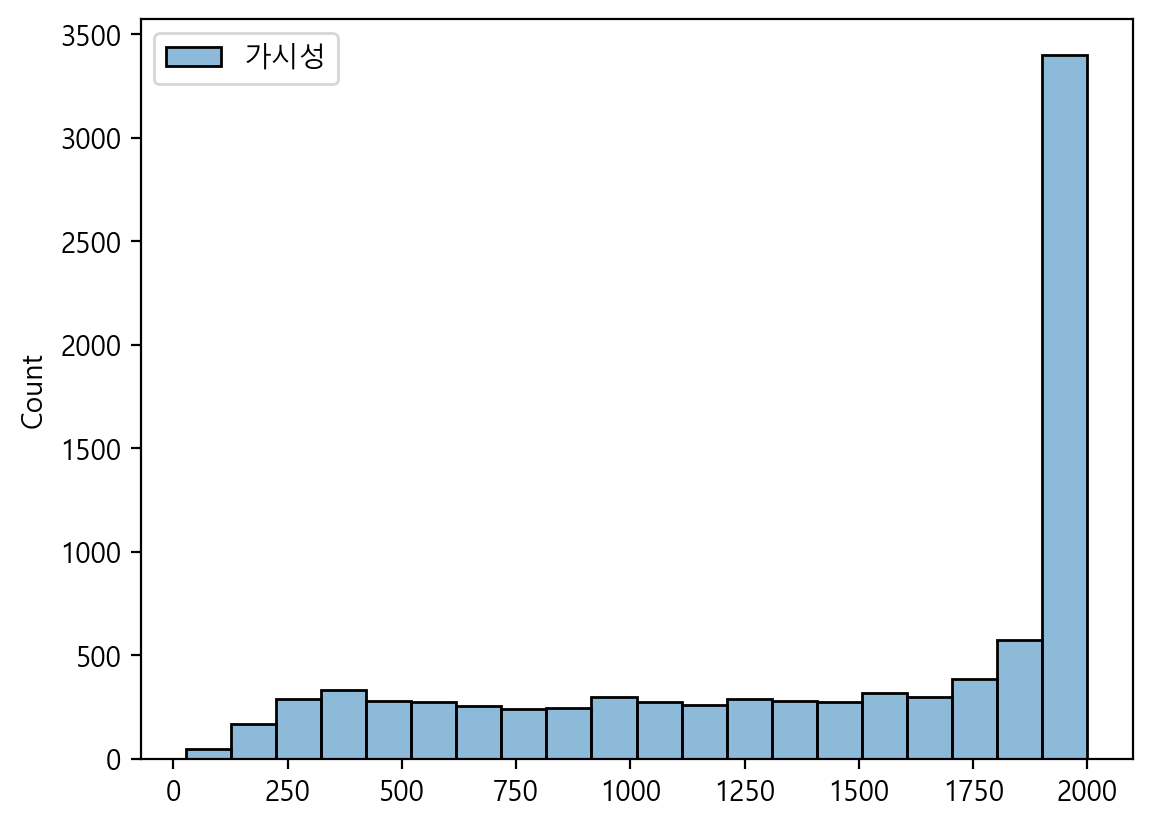

In [379]:
new_df.boxplot()
plt.show()
# 대여횟수의 이상치가 매우 많다. 
sns.histplot(new_df[['대여횟수']])
plt.show()


new_df['가시성'].describe()
# 가시성의 값이 2000인 데이터가 많이 분포되어 있어 한쪽으로 치우쳐져 있음
sns.histplot(new_df[['가시성']])
# Negatively Skewed (왼쪽 꼬리가 긴 분포) => 

<Axes: >

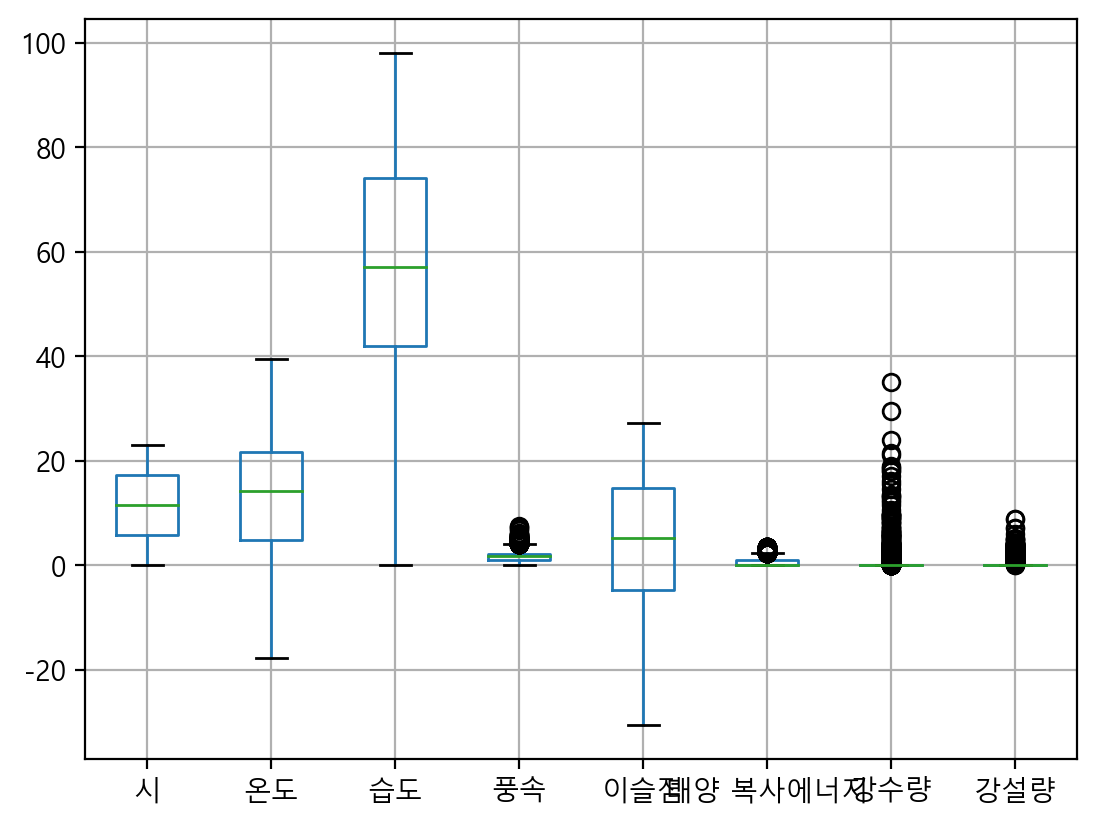

<Axes: >

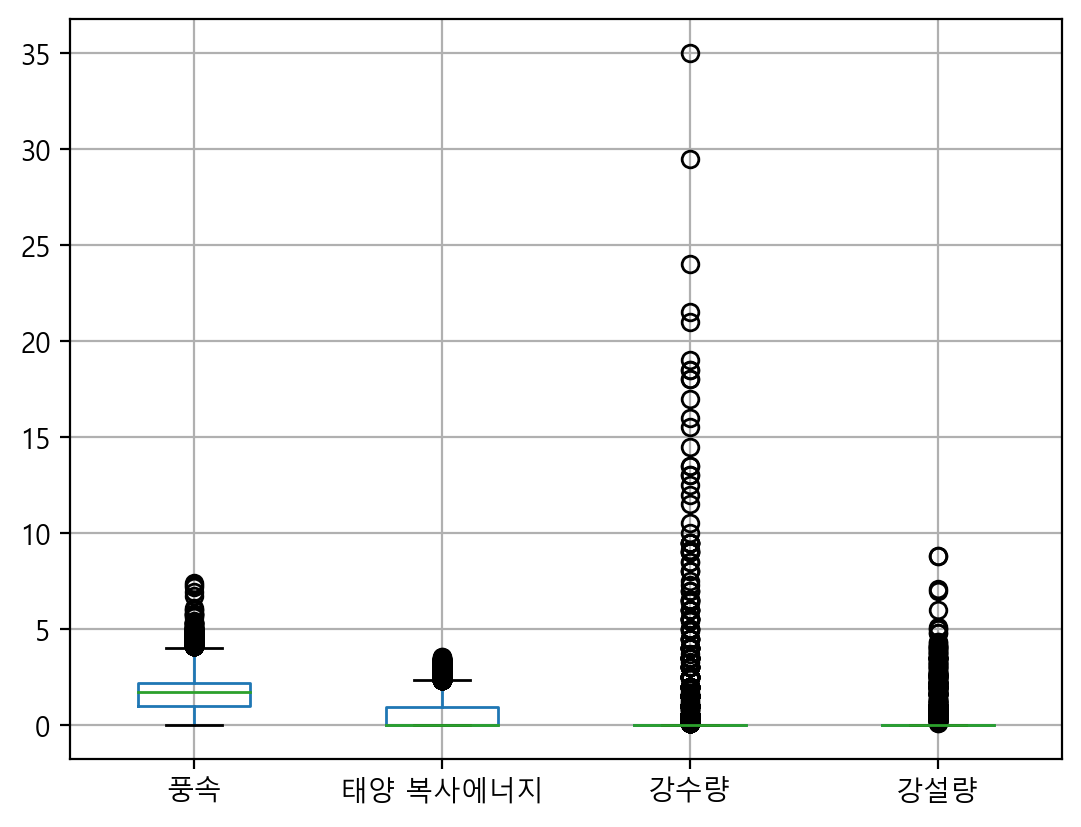

In [380]:
new_df.drop(['대여횟수','가시성'] , axis=1).boxplot()
plt.show()
# 풍속, 복사에너지, 강수량 ,강설량 재확인
new_df[['풍속','태양 복사에너지','강수량','강설량']].boxplot()

<Axes: ylabel='Count'>

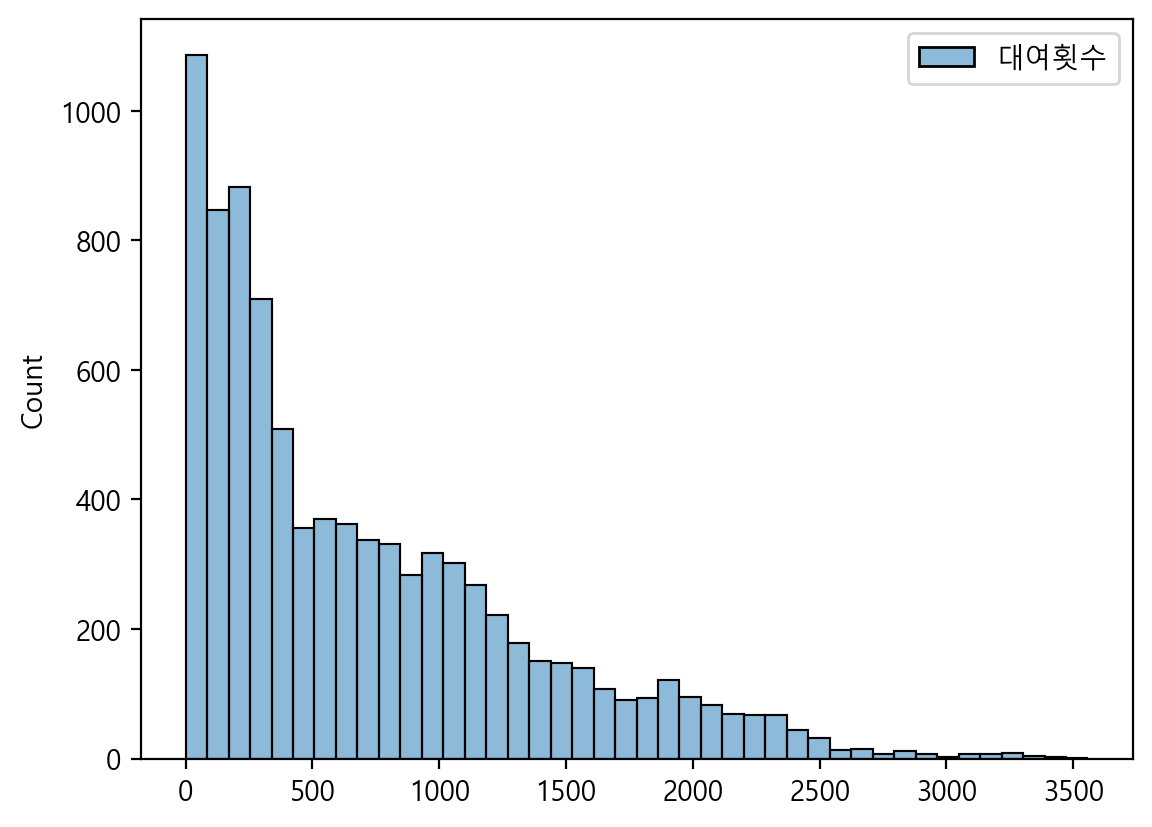

<Axes: ylabel='Count'>

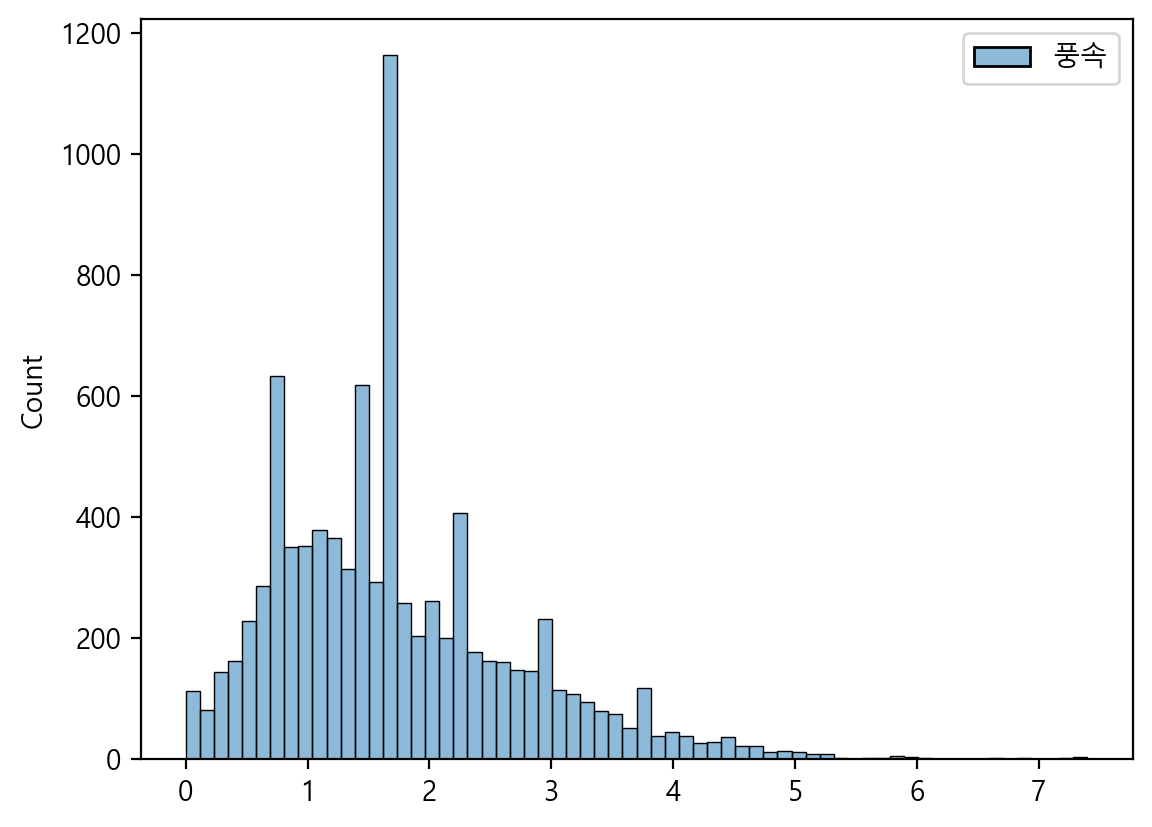

<Axes: ylabel='Count'>

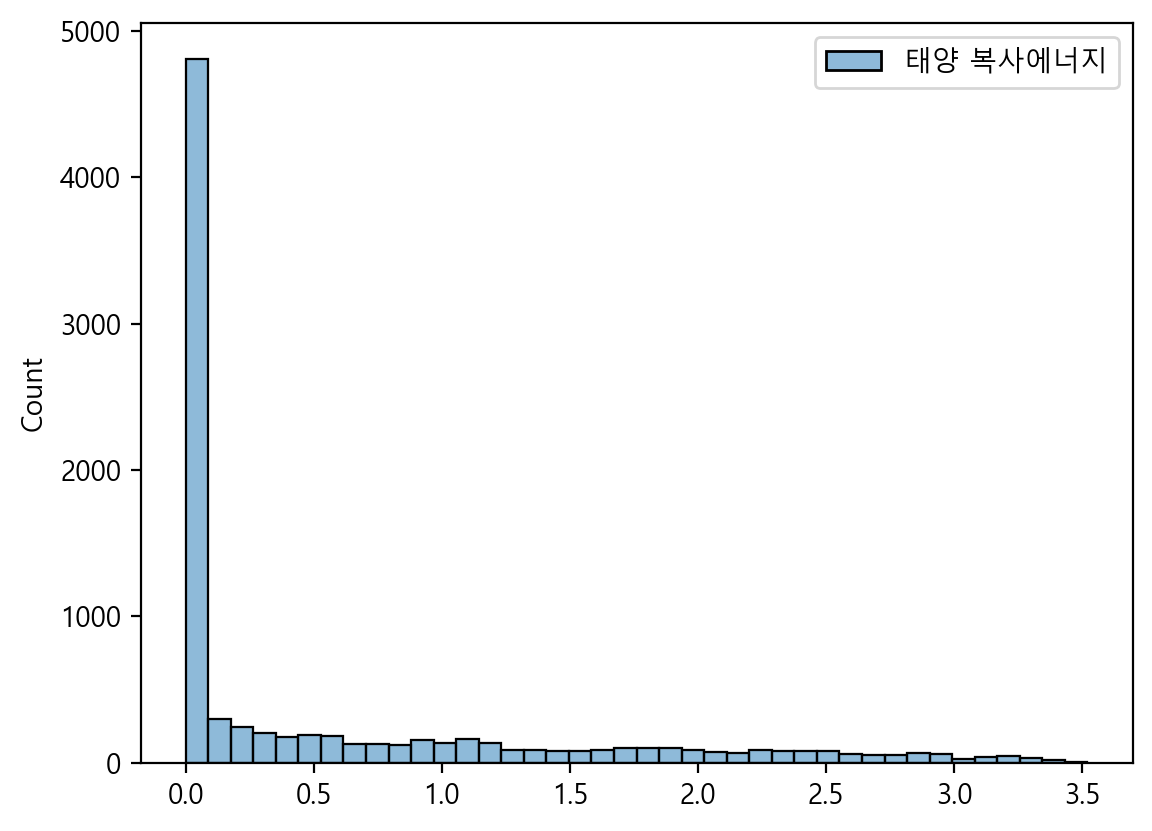

<Axes: ylabel='Count'>

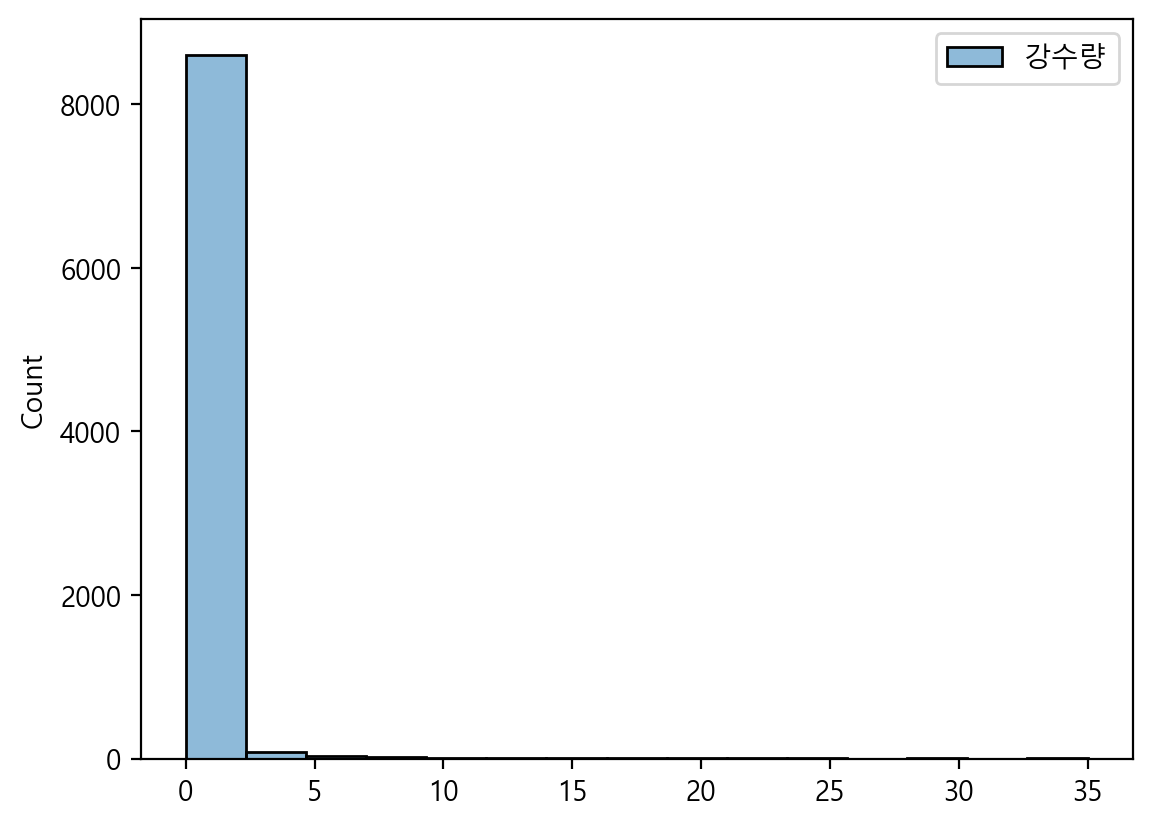

<Axes: ylabel='Count'>

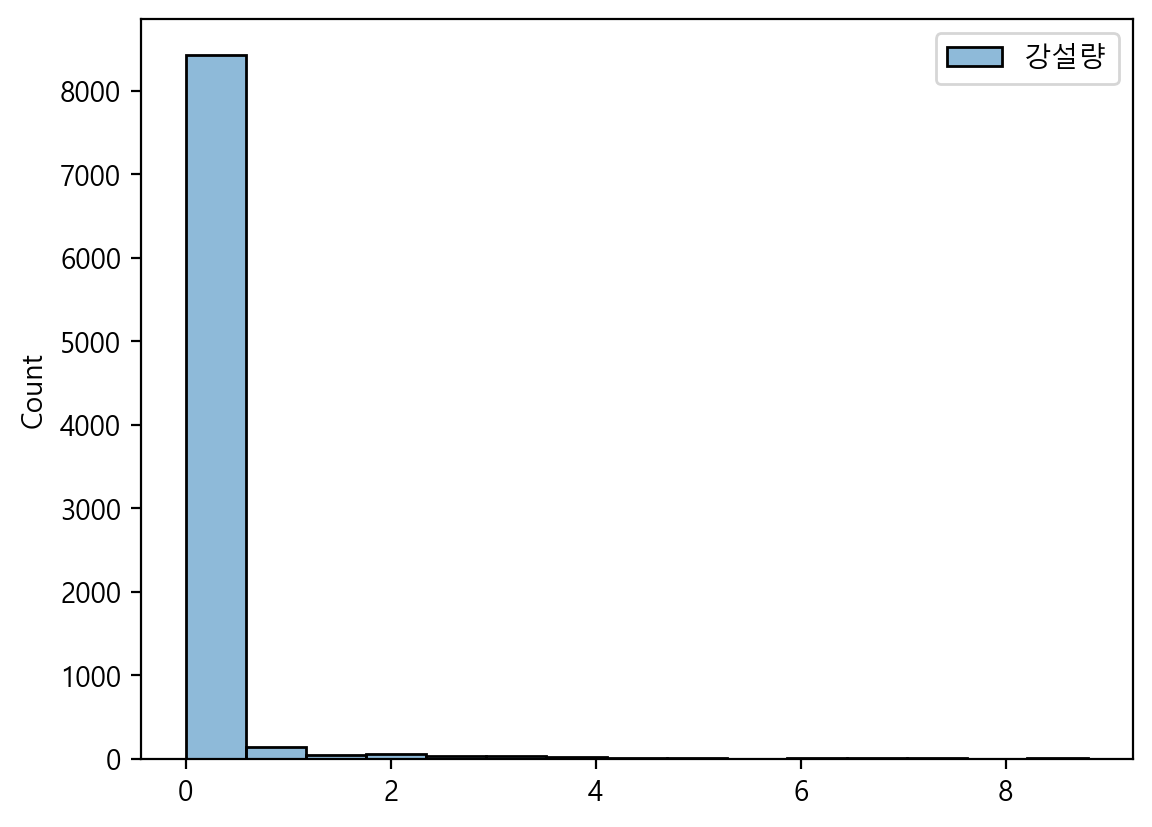

count    8760.000000
mean     1436.825799
std       608.298712
min        27.000000
25%       940.000000
50%      1698.000000
75%      2000.000000
max      2000.000000
Name: 가시성, dtype: float64

In [381]:
# 이상치가 많은 열들의 분포
# 공통점 : right-skewed 
# minmax 스케일링 보다 로그변환하여 전체 범위를 낮춰주는 것이 좋을 것

sns.histplot(new_df[['대여횟수']])
plt.show()
sns.histplot(new_df[['풍속']])
plt.show()
sns.histplot(new_df[['태양 복사에너지']])
plt.show()
sns.histplot(new_df[['강수량']])
plt.show()
sns.histplot(new_df[['강설량']])
plt.show()
# 강수량, 강설량 태양 복사에너지는 최빈값과 평균값이 비슷함
# 장마, 폭설, 폭염 기간에 가끔 발생하는 이상치라고 판단하여 제거
# 풍속, 대여횟수는 스케일링 하여 정규분포에 근사하게 함 


new_df['가시성'].describe()
# 얘만 left-skewed

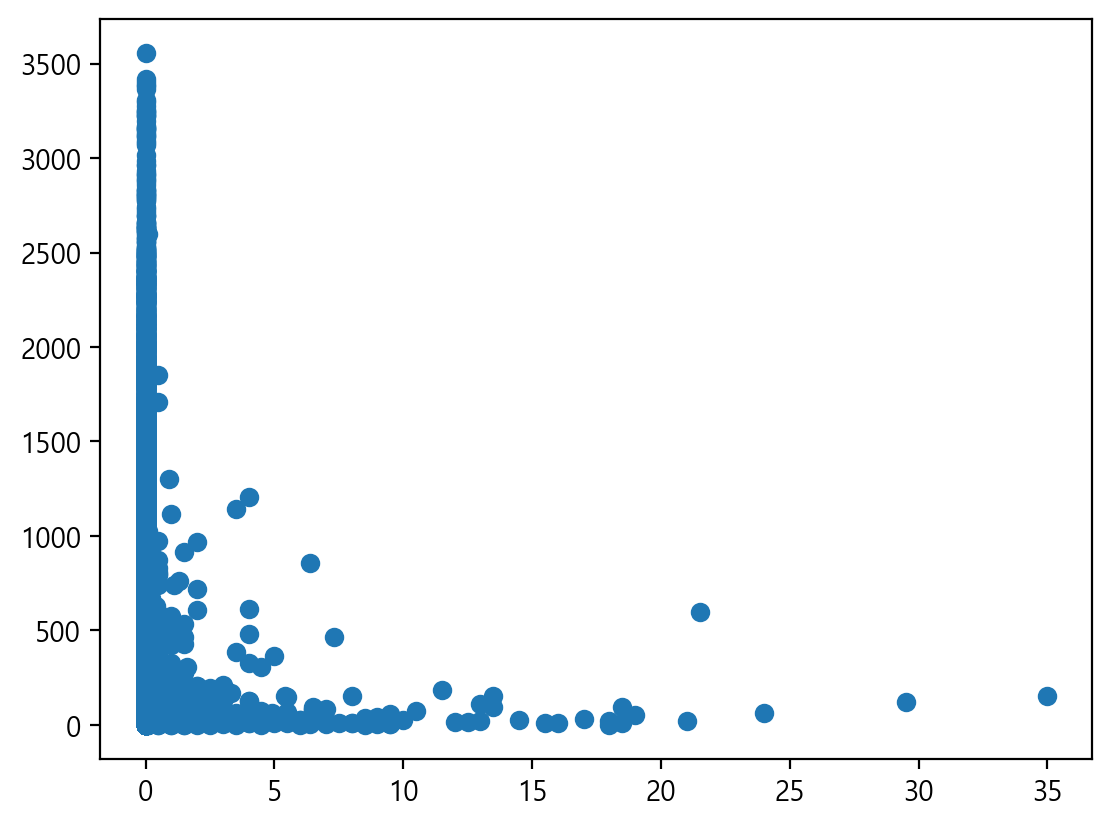

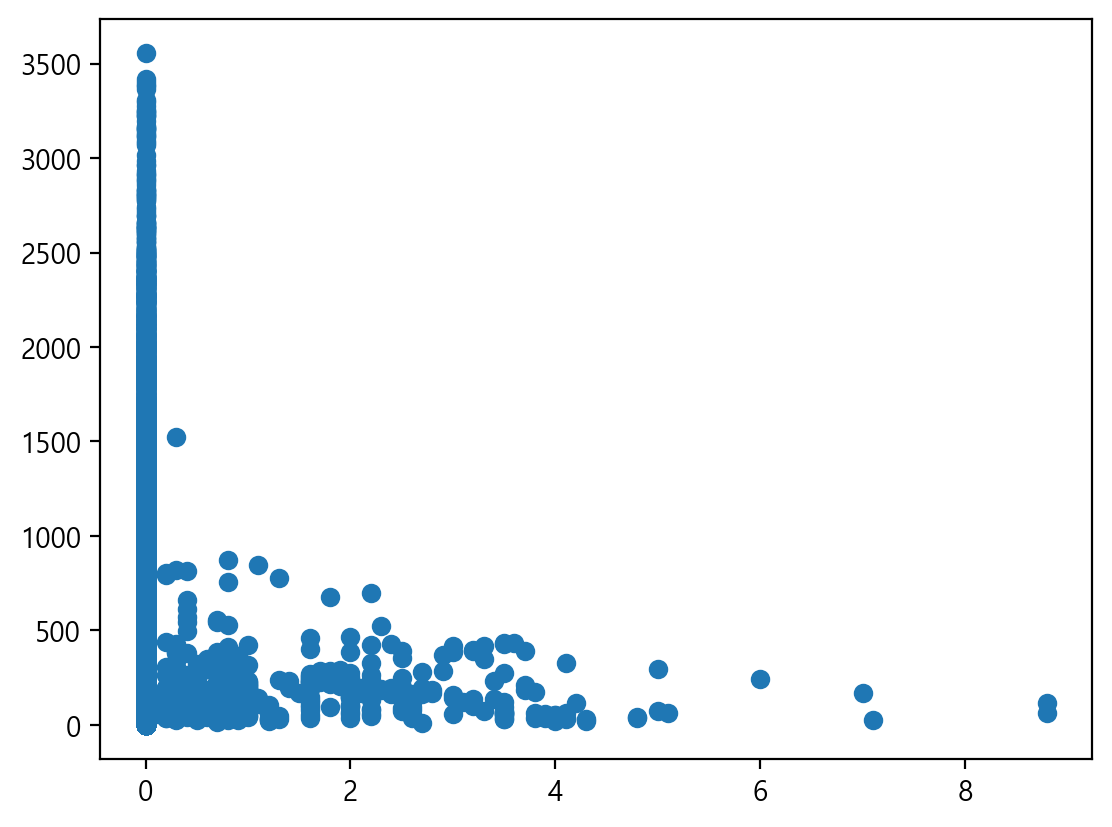

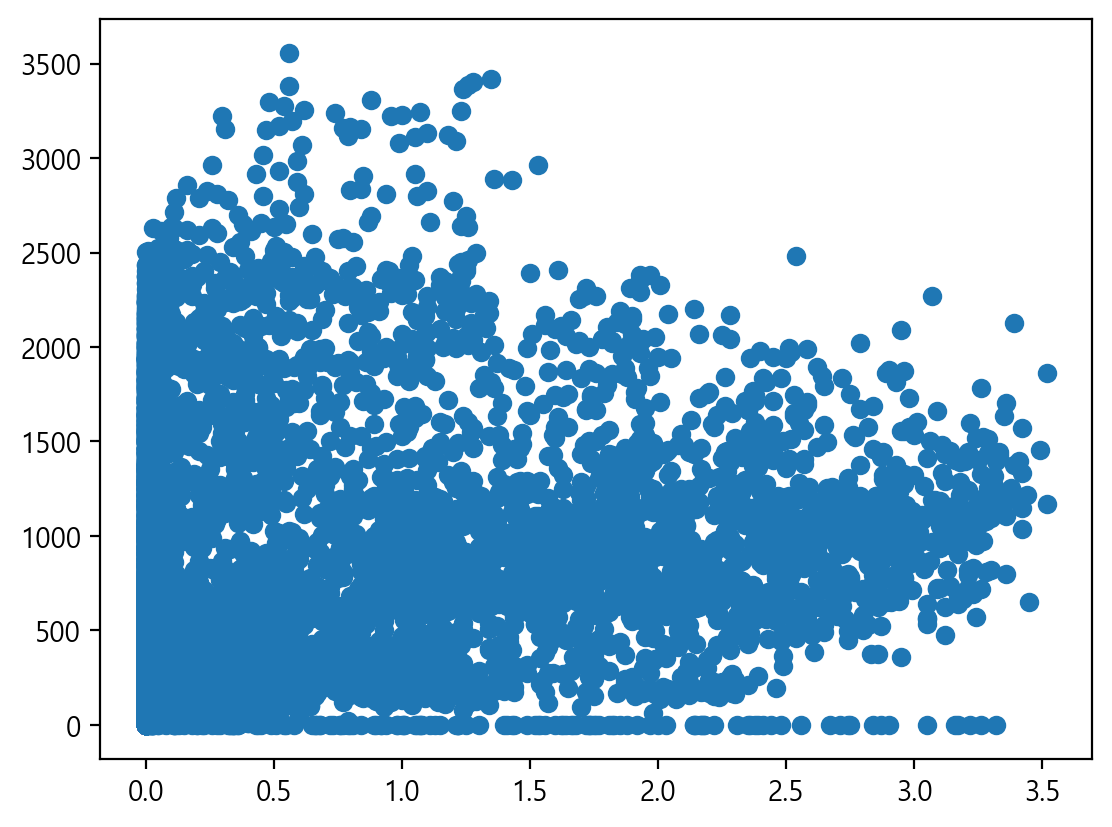

In [382]:
# 대여횟수와 날씨의 관계
plt.scatter(new_df['강수량'],new_df['대여횟수']) 
# 강수량 20지점에 이상치 발견됨 비가 20이 넘지만 대여횟수 500넘음
plt.show()
plt.scatter(new_df['강설량'],new_df['대여횟수'])
plt.show()
plt.scatter(new_df['태양 복사에너지'],new_df['대여횟수'])


In [383]:
new_df[['대여횟수','강수량']].sort_values(by='강수량',ascending=False).head(5)
# 5034 행 삭제
new_df=new_df.drop([5034], axis=0)
new_df.shape

,대여횟수,강수량
3997,151,35.0
6501,122,29.5
5132,61,24.0
5034,596,21.5
6524,19,21.0


(8759, 10)

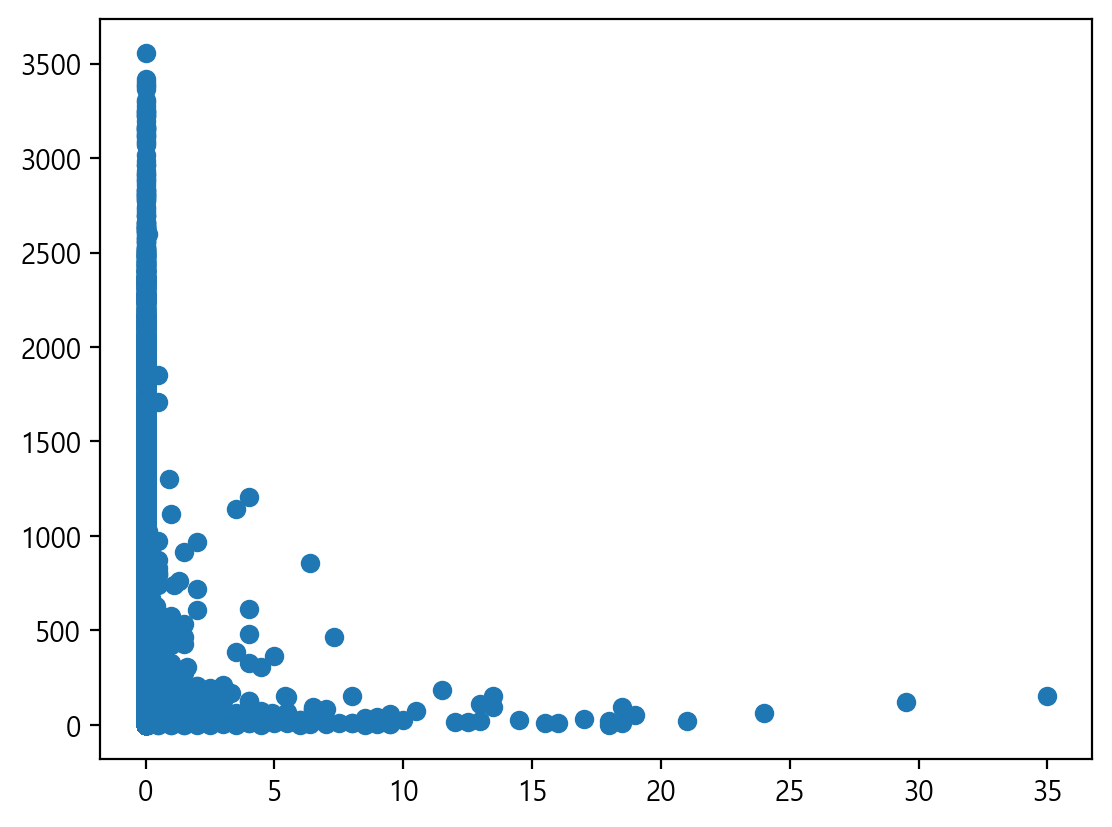

In [384]:
# 이상치 제거한 데이터 산포도 출력 
plt.scatter(new_df['강수량'],new_df['대여횟수']) 


### 로그 변환 및 스케일링

<Axes: >

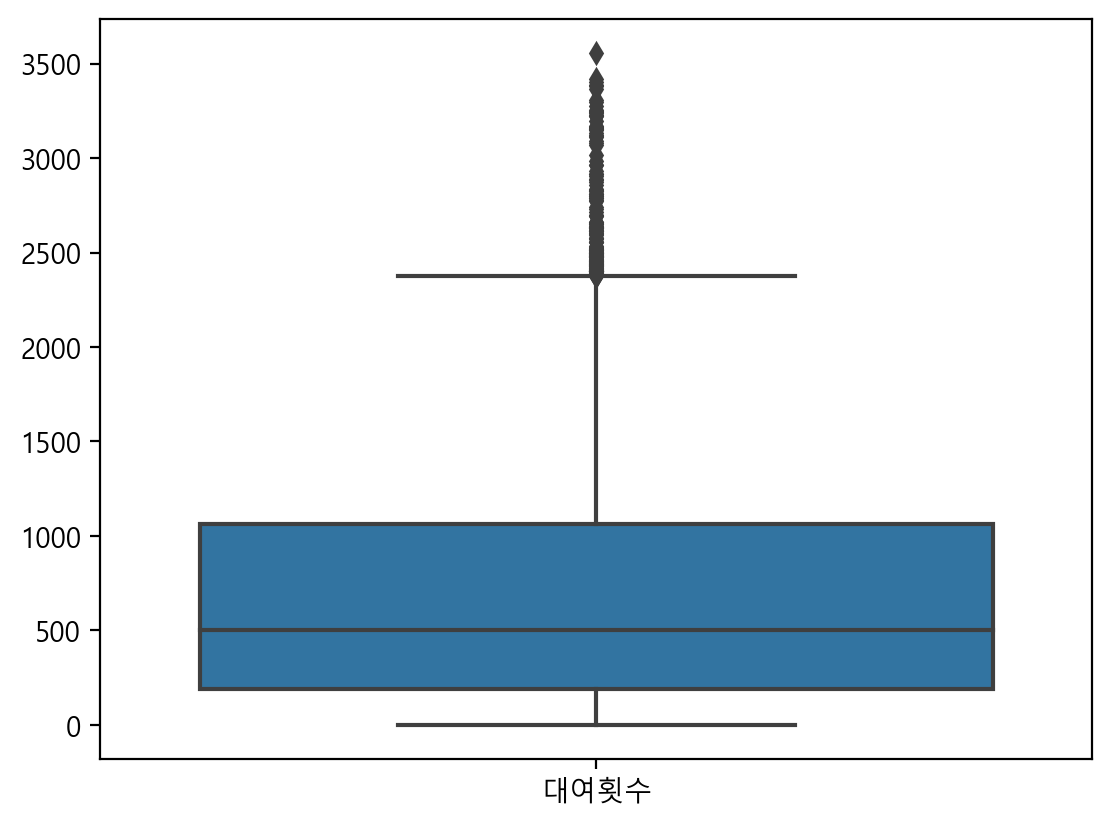

In [385]:
# 대여횟수 먼저 처리해보기 
sns.boxplot(new_df[['대여횟수']])
lent_df=new_df.copy()

C:\Users\minye\AppData\Local\Temp\ipykernel_13292\4040684231.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[['대여횟수']], fit=stats.norm)


<Axes: ylabel='Density'>

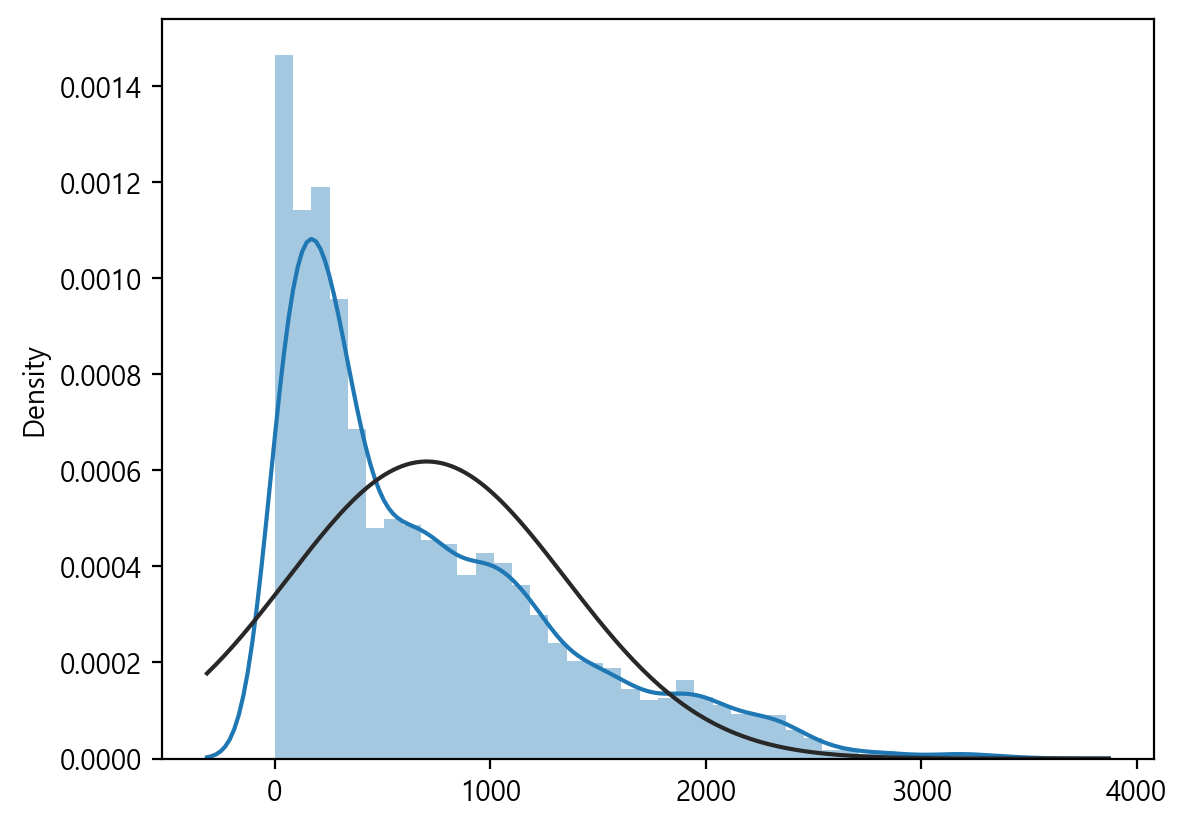

In [386]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

sns.distplot(new_df[['대여횟수']], fit=stats.norm)

,대여횟수
4818,4.420777
4866,4.206823
4650,4.185117
4842,4.154109
4458,4.147908
4890,4.124652
4554,4.037829
6810,4.020775
6978,3.988217
6858,3.955658


,대여횟수
7369,-1.092432
7370,-1.092432
7371,-1.092432
3159,-1.092432
7372,-1.092432
3158,-1.092432
7376,-1.092432
3157,-1.092432
7288,-1.092432
7234,-1.092432


C:\Users\minye\AppData\Local\Temp\ipykernel_13292\1448579387.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lent_df[['대여횟수']], fit=stats.norm)


<Axes: ylabel='Density'>

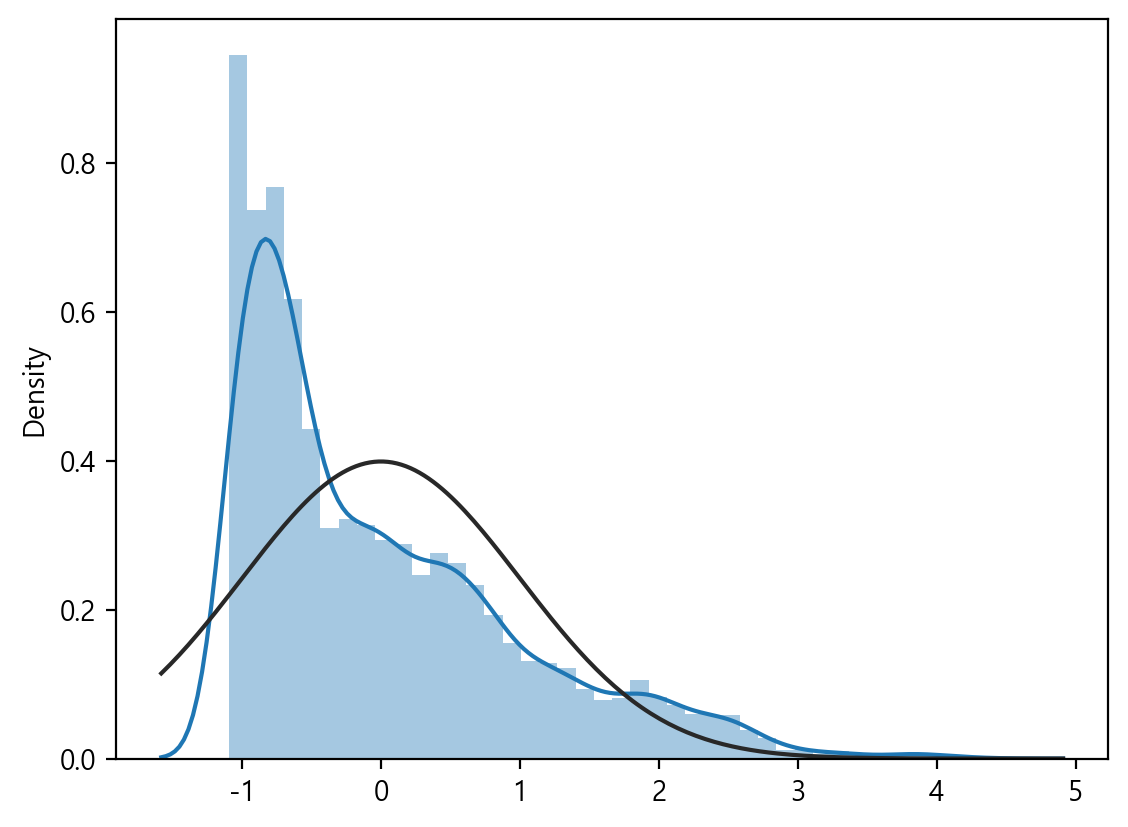

<Axes: >

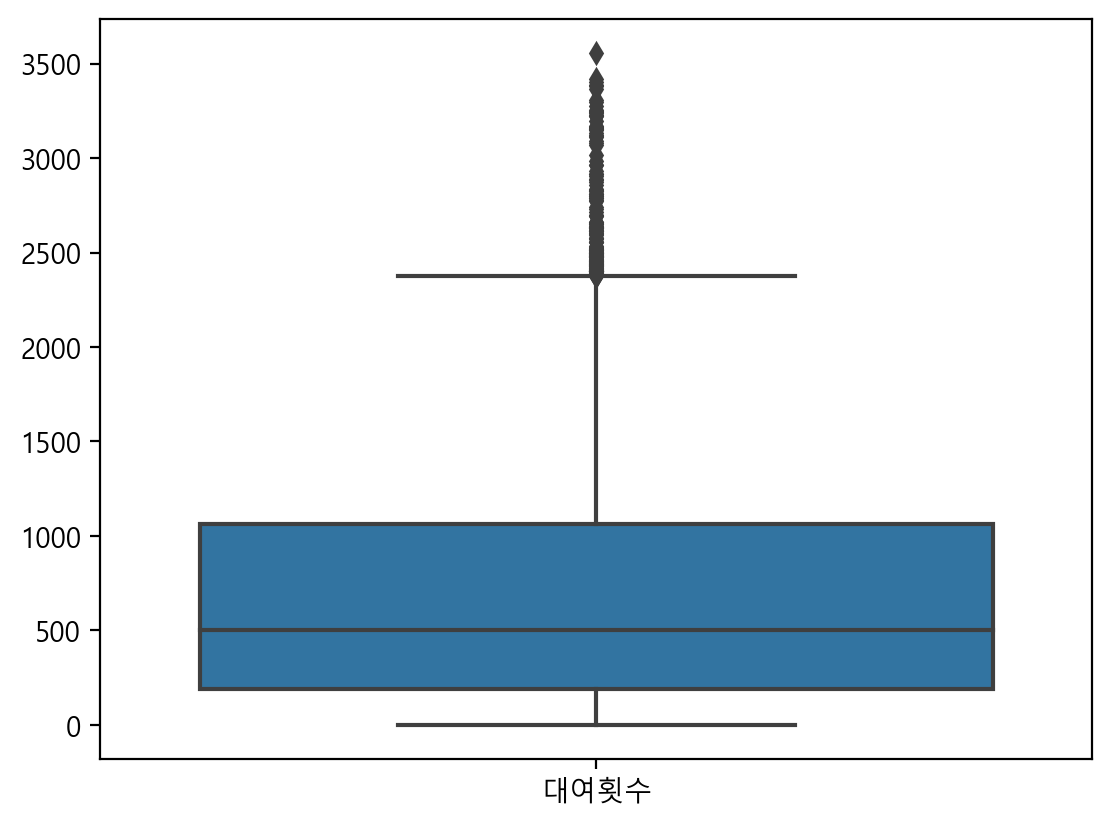

<Axes: >

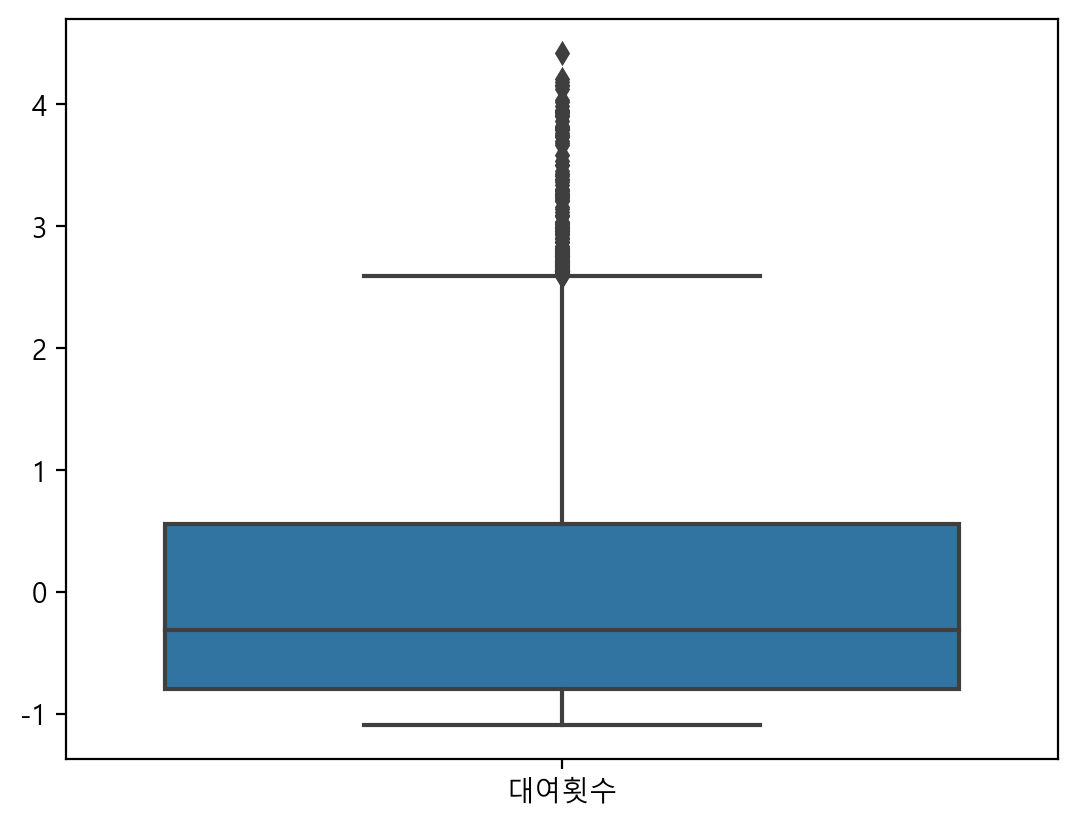

In [387]:
lent_df['대여횟수']=scaler.fit_transform(lent_df[['대여횟수']])
lent_df[['대여횟수']].sort_values(by='대여횟수',ascending=False).head(10)
lent_df[['대여횟수']].sort_values(by='대여횟수',ascending=False).tail(10)
# 크게 벗어나는 값은 없음

sns.distplot(lent_df[['대여횟수']], fit=stats.norm)
plt.show()
sns.boxplot(new_df[['대여횟수']])
plt.show()
sns.boxplot(lent_df[['대여횟수']])

# 스케일링 한 후 거의 차이가 없음 

C:\Users\minye\AppData\Local\Temp\ipykernel_13292\160236073.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[['대여횟수']],fit=stats.norm)


<Axes: ylabel='Density'>

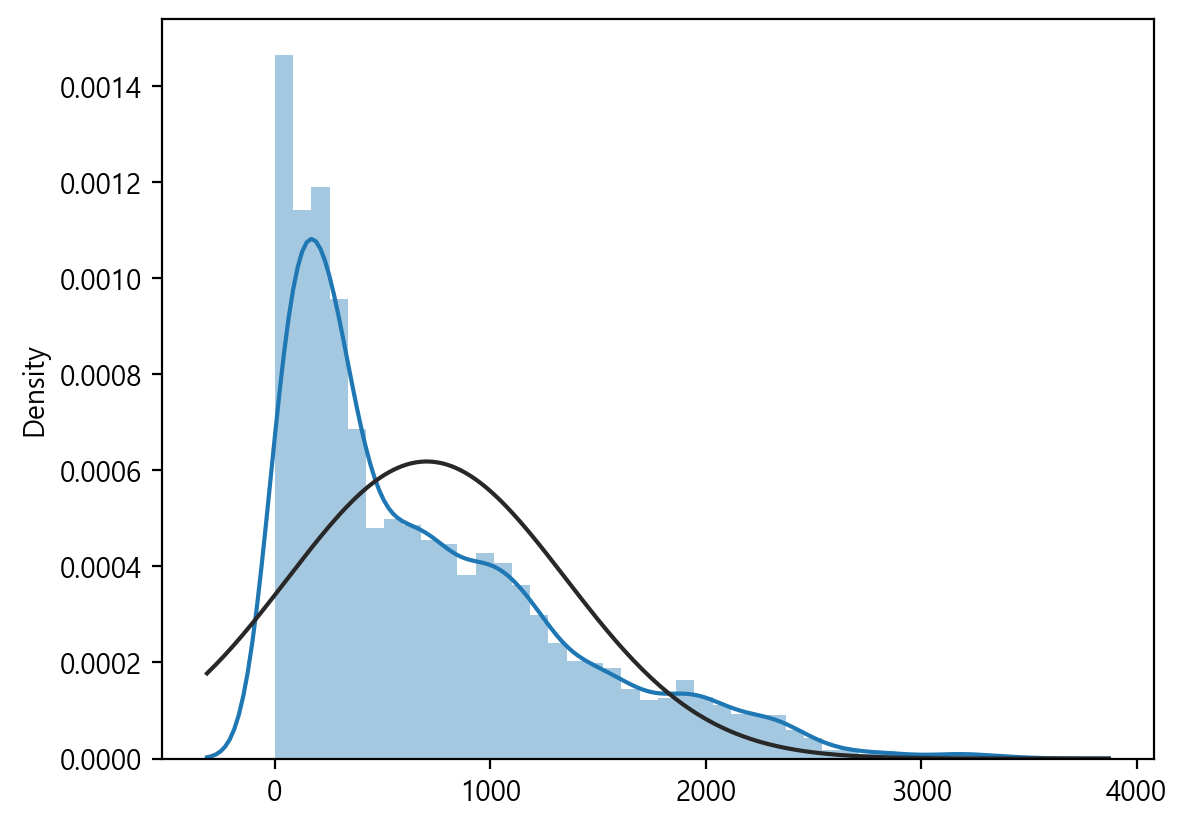

C:\Users\minye\AppData\Local\Temp\ipykernel_13292\160236073.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lent_df['대여횟수_2'], fit=stats.norm)


<Axes: xlabel='대여횟수_2', ylabel='Density'>

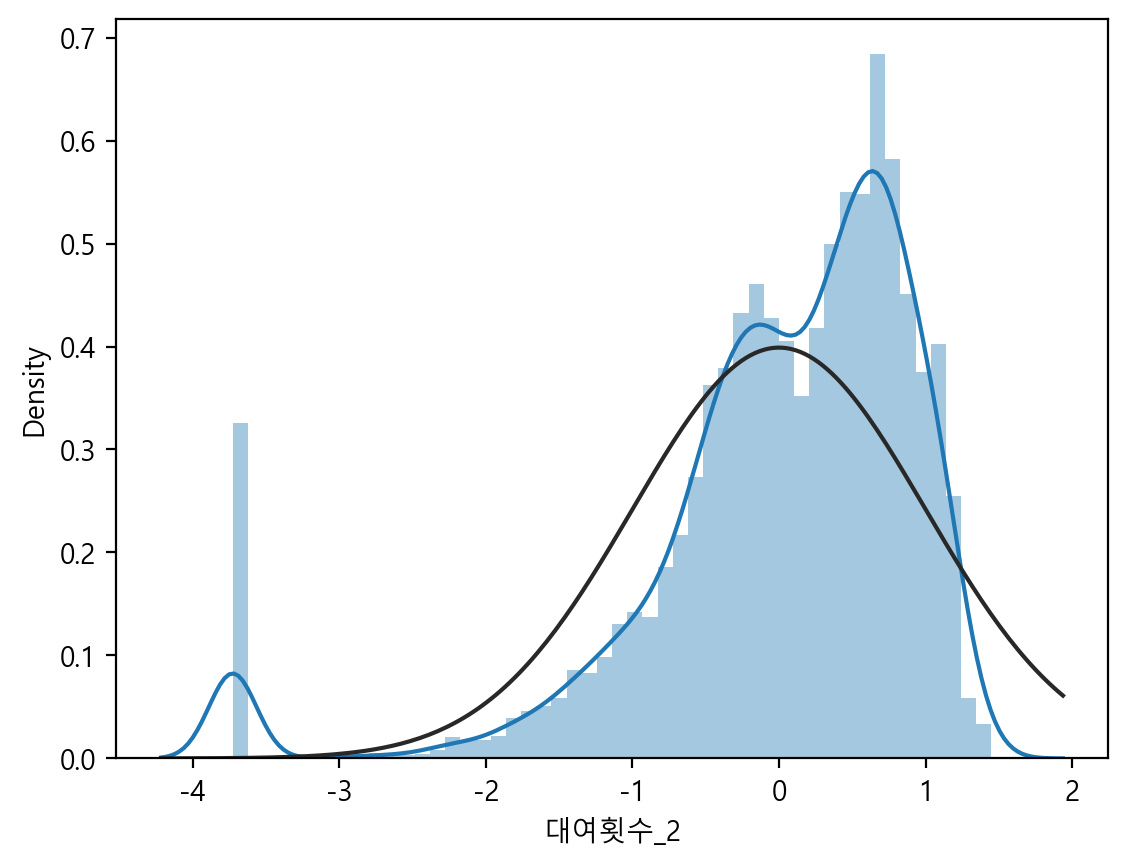

In [388]:
# 로그변환 후 스케일링
lent_df= new_df.copy()
lent_df['대여횟수_2']=scaler.fit_transform(np.log1p(lent_df[['대여횟수']]))

sns.distplot(new_df[['대여횟수']],fit=stats.norm)
plt.show()
sns.distplot(lent_df['대여횟수_2'], fit=stats.norm)

,대여횟수,시,온도,습도,풍속,가시성,이슬점,태양 복사에너지,강수량,강설량,대여횟수_log
0,254,0,-5.2,37,2.20000,2000,-17.6,0.0,0.0,0.0,5.541264
1,204,1,-5.5,38,0.80000,2000,-17.6,0.0,0.0,0.0,5.323010
2,173,2,-6.0,39,1.00000,2000,-17.7,0.0,0.0,0.0,5.159055
3,107,3,-6.2,40,0.90000,2000,-17.6,0.0,0.0,0.0,4.682131
4,78,4,-6.0,36,1.72722,2000,-18.6,0.0,0.0,0.0,4.369448


C:\Users\minye\AppData\Local\Temp\ipykernel_13292\3694671834.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lent_df['대여횟수_log'], fit=stats.norm)


<Axes: xlabel='대여횟수_log', ylabel='Density'>

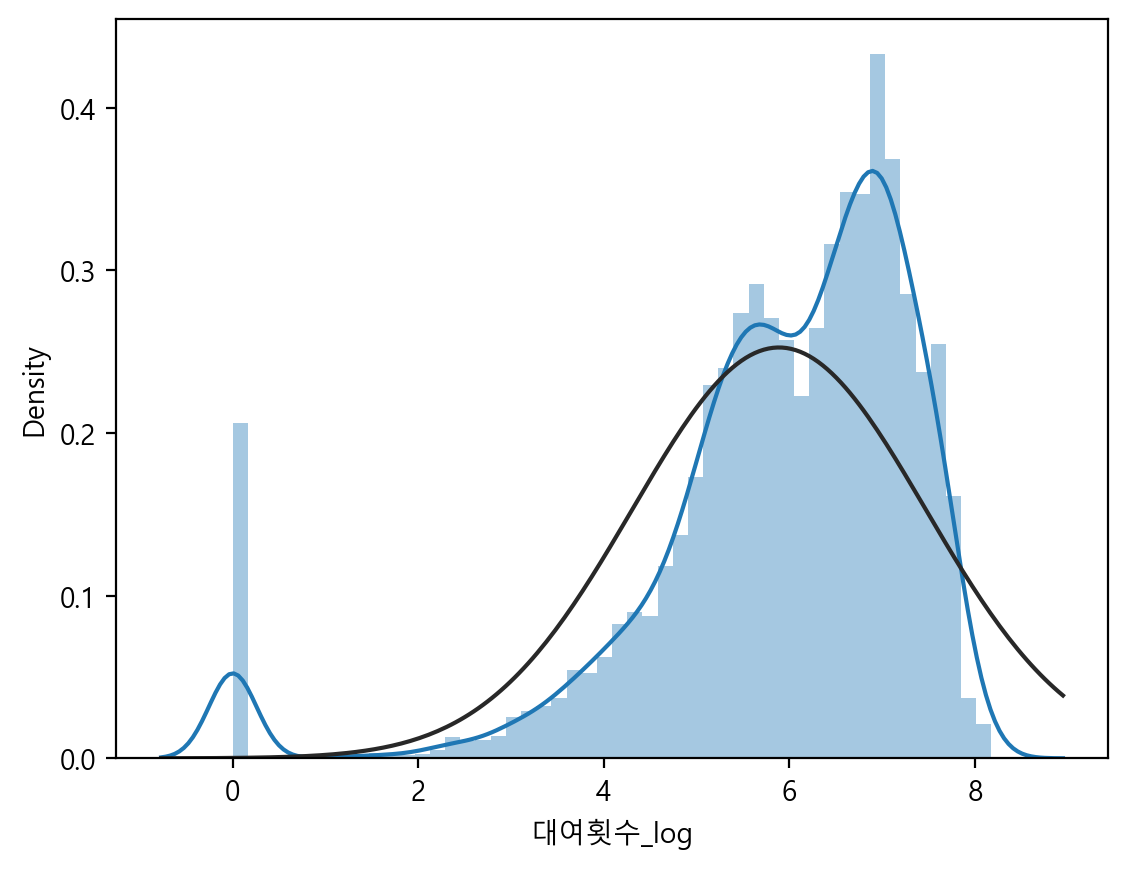

In [389]:
# 로그 변환만
lent_df= new_df.copy()
lent_df['대여횟수_log']=np.log1p(lent_df[['대여횟수']])
lent_df.head()
sns.distplot(lent_df['대여횟수_log'], fit=stats.norm)

count     295
unique      1
top        No
freq      295
Name: 작동여부, dtype: object

,날짜,대여횟수,시,온도,습도,풍속,가시성,이슬점,태양 복사에너지,강수량,강설량,계절,휴무일여부,작동여부
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Winter,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


C:\Users\minye\AppData\Local\Temp\ipykernel_13292\1654107251.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[['대여횟수']])


<Axes: ylabel='Density'>

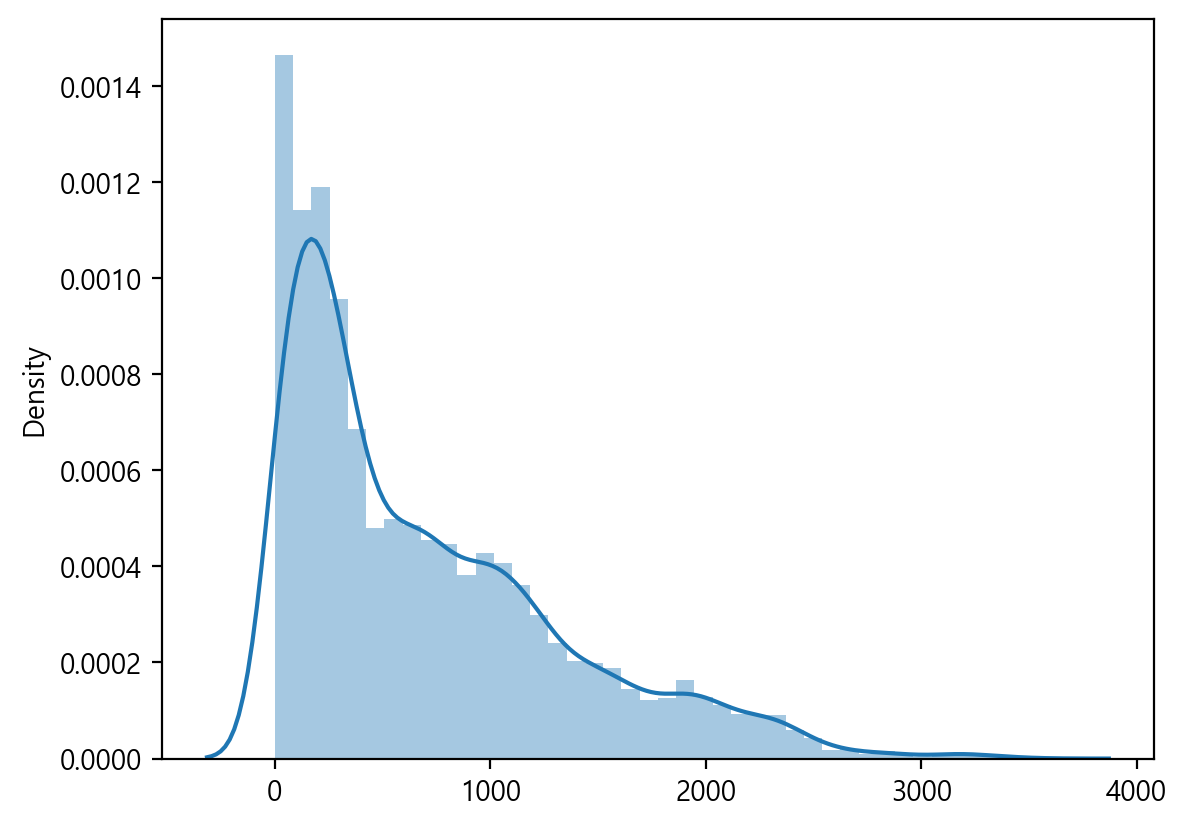

C:\Users\minye\AppData\Local\Temp\ipykernel_13292\1654107251.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lent_df['대여횟수_2'], fit=stats.norm)


<Axes: xlabel='대여횟수_2', ylabel='Density'>

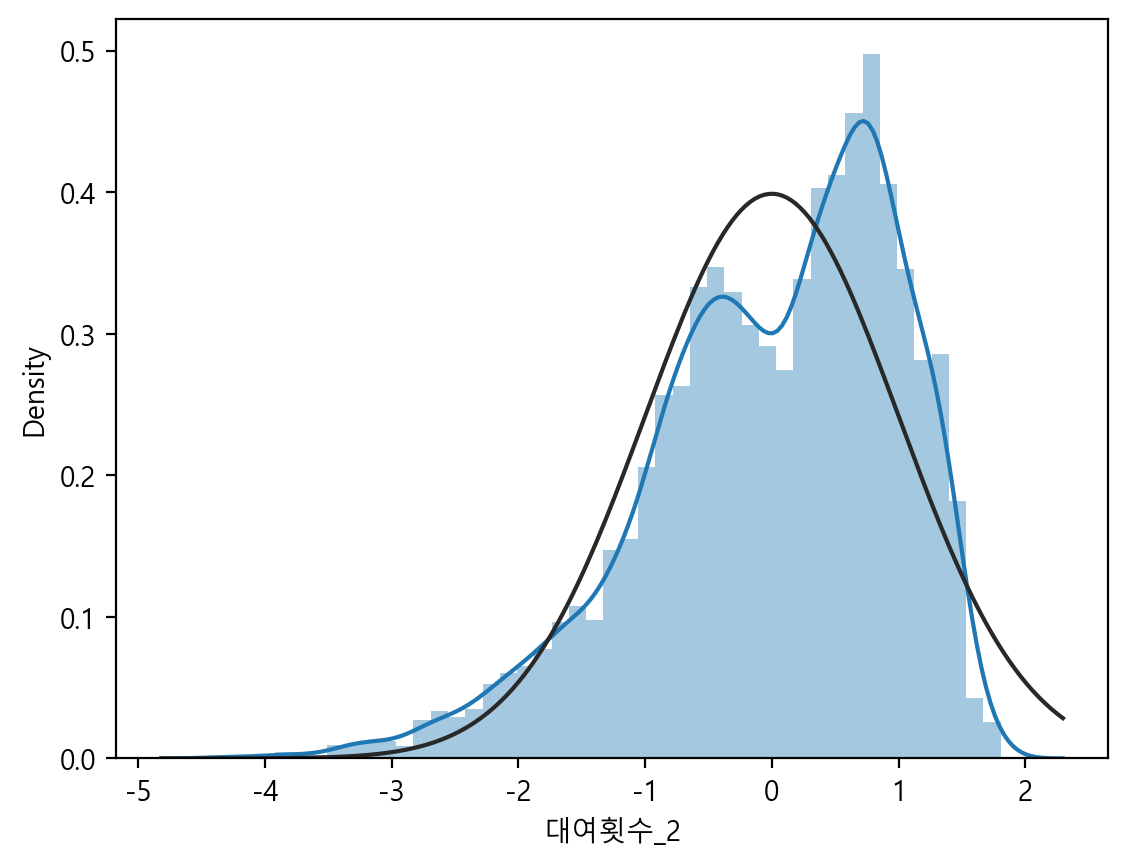

In [390]:
df[df['대여횟수']==0]['작동여부'].describe()
# 작동하지 않은 날에 대여횟수가 No이기 때문에 대여횟수 0인 것은 삭제

df_new=df.drop(df[df['대여횟수']==0].index,axis=0)
df_new
# 삭제 후에 로그변환 후 스케일링
lent_df= df_new.copy()
lent_df['대여횟수_2']=scaler.fit_transform(np.log1p(lent_df[['대여횟수']]))
sns.distplot(new_df[['대여횟수']])
plt.show()
sns.distplot(lent_df['대여횟수_2'], fit=stats.norm)

# 그 전보다 정규분포에 근사한다.

## 풍속

<Axes: >

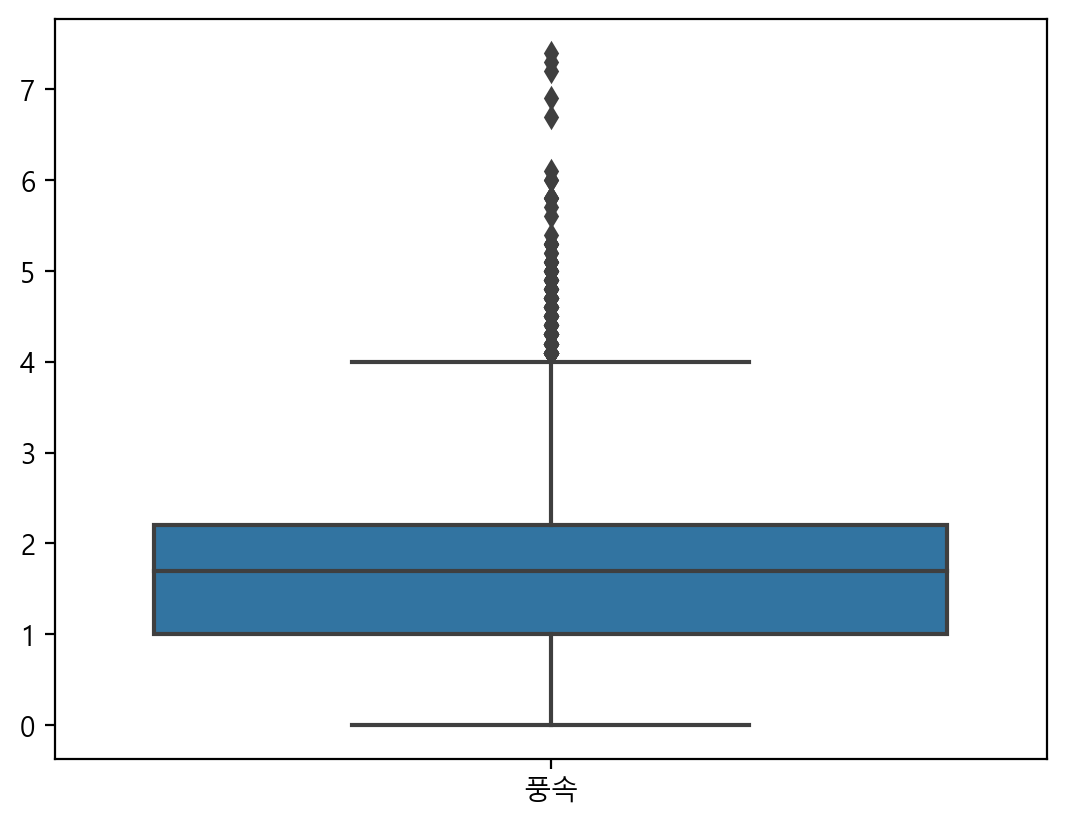

C:\Users\minye\AppData\Local\Temp\ipykernel_13292\110501867.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[['풍속']], fit=stats.norm)


<Axes: ylabel='Density'>

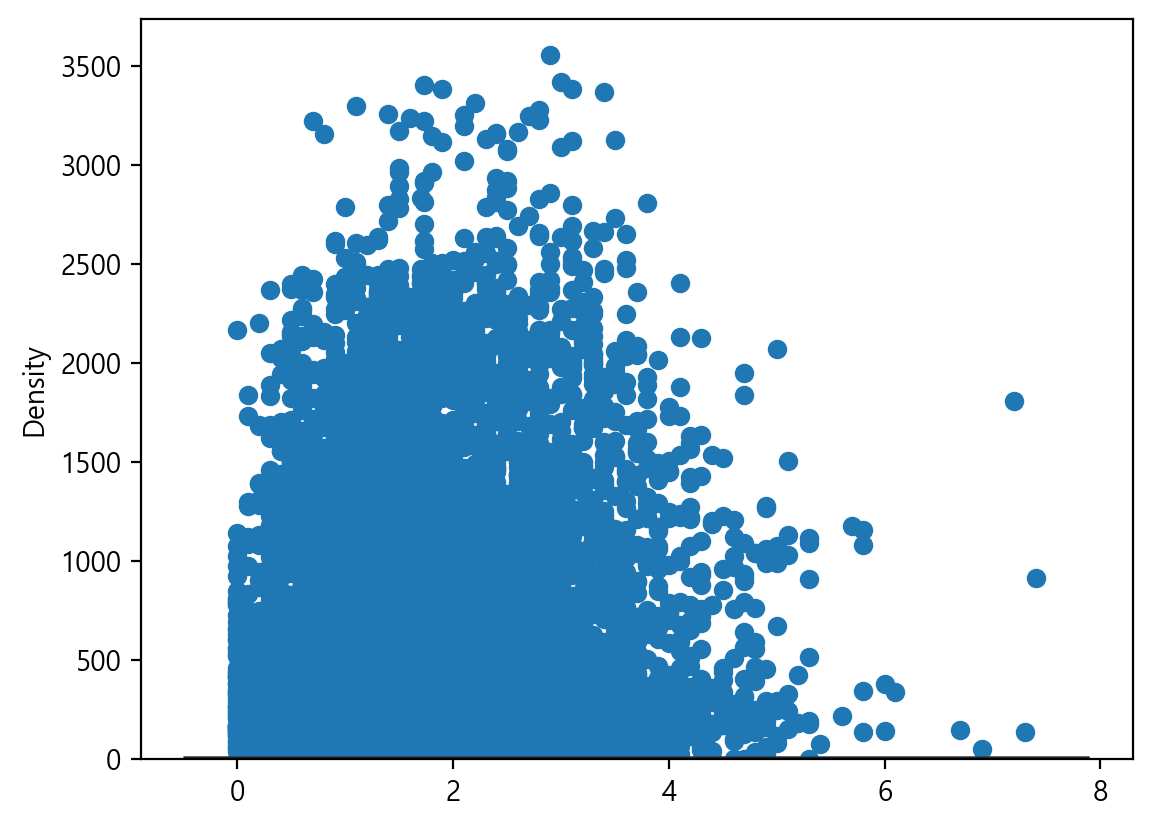

In [391]:
sns.boxplot(new_df[['풍속']])
plt.show()
sns.distplot(new_df[['풍속']], fit=stats.norm)
plt.scatter(new_df['풍속'],new_df['대여횟수']) 
# 풍속이 매우 강할 때 대여횟수가 높은 이상치 2개 발견함

In [392]:
new_df[['대여횟수','풍속']].sort_values(by='풍속',ascending=False).head(5)
# 3134 3138 행 삭제
new_df=new_df.drop([3138,3134], axis=0)
new_df.shape

,대여횟수,풍속
3134,913,7.4
3141,133,7.3
3138,1805,7.2
6316,49,6.9
933,146,6.7


(8757, 10)

,풍속
3141,5.691204
6316,5.282788
933,5.078580
3140,4.465957
2174,4.363853
1309,4.363853
3139,4.159646
87,4.159646
1724,4.159646
3136,4.159646


,풍속
8018,-1.762378
114,-1.762378
5141,-1.762378
113,-1.762378
5353,-1.762378
1899,-1.762378
6772,-1.762378
8226,-1.762378
8265,-1.762378
5139,-1.762378


C:\Users\minye\AppData\Local\Temp\ipykernel_13292\3754699764.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lent_df[['풍속']], fit=stats.norm)


<Axes: ylabel='Density'>

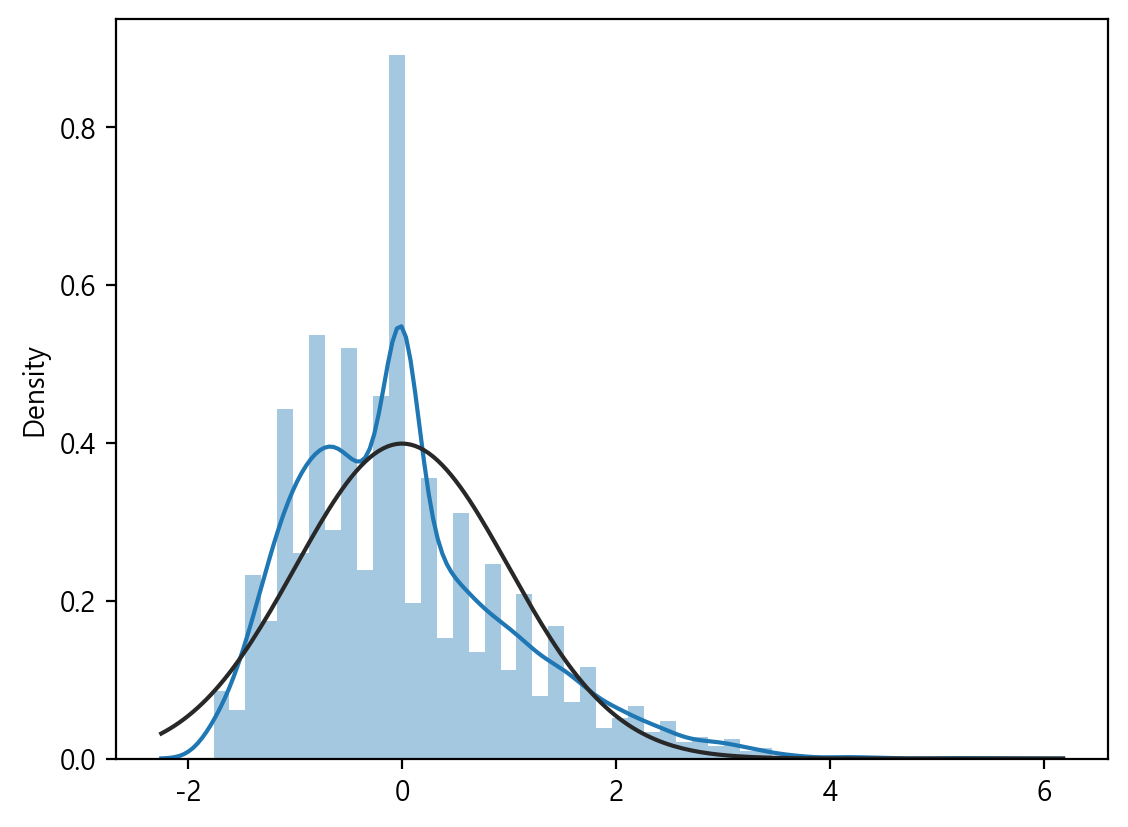

<Axes: >

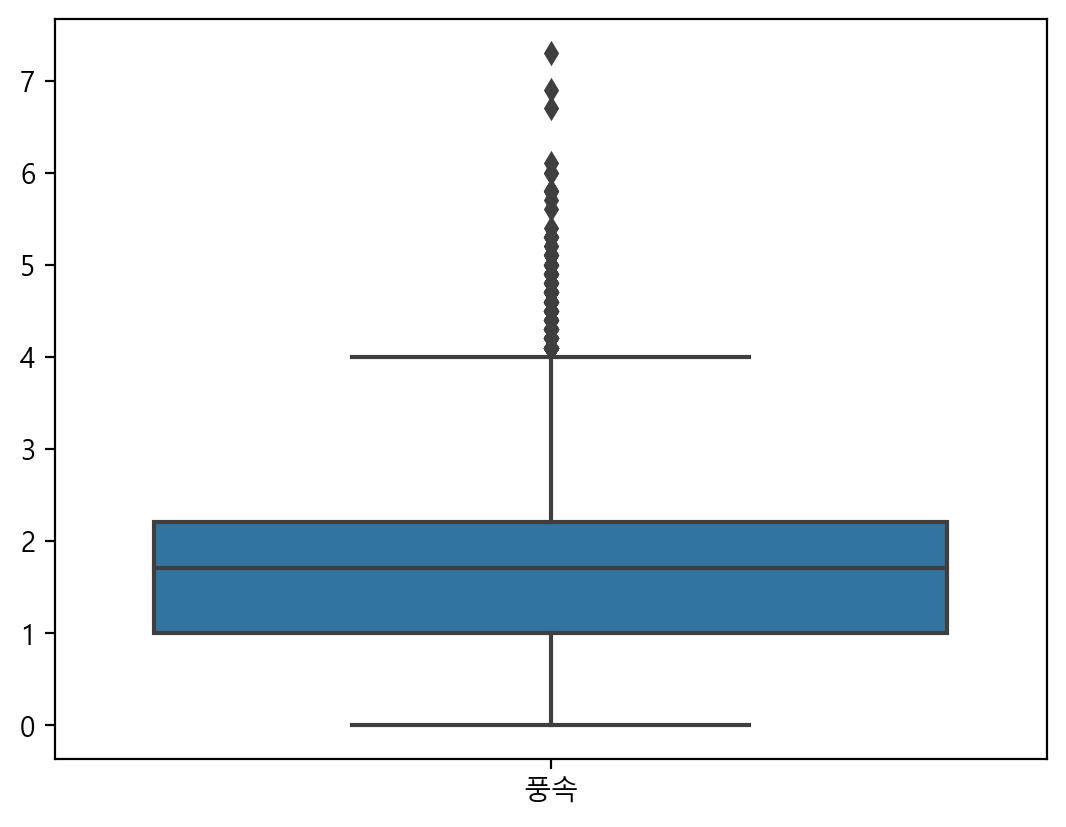

<Axes: >

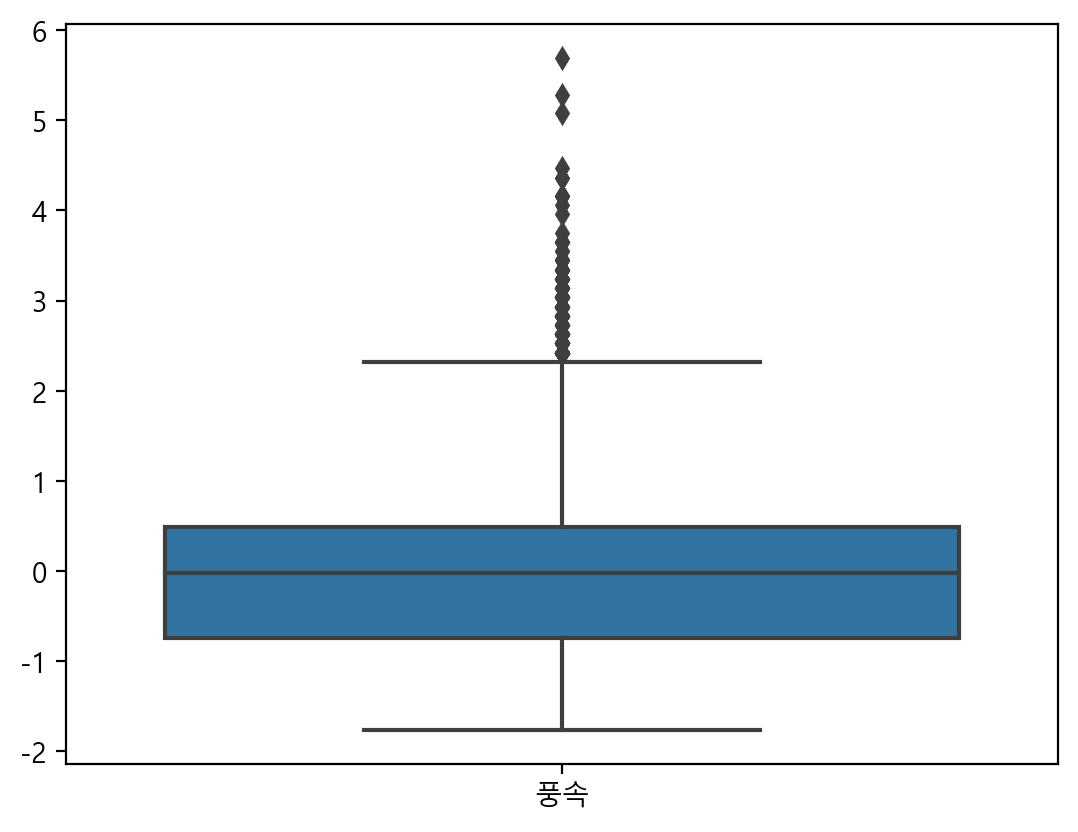

In [393]:
lent_df=new_df.copy()
lent_df['풍속']=scaler.fit_transform(lent_df[['풍속']])
lent_df[['풍속']].sort_values(by='풍속',ascending=False).head(20)
lent_df[['풍속']].sort_values(by='풍속',ascending=False).tail(10)
# 4,5 수준의 값은 조금 큰 것으로 보임 

sns.distplot(lent_df[['풍속']], fit=stats.norm)
plt.show()
sns.boxplot(new_df[['풍속']])
plt.show()
sns.boxplot(lent_df[['풍속']])

# 스케일링 한 후 거의 차이가 없음 

,대여횟수,시,온도,습도,풍속,가시성,이슬점,태양 복사에너지,강수량,강설량
0,254,0,-5.2,37,1.163151,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.587787,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,0.693147,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.641854,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,1.003283,2000,-18.6,0.0,0.0,0.0


C:\Users\minye\AppData\Local\Temp\ipykernel_13292\69622896.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lent_df['풍속'], fit=stats.norm)


<Axes: xlabel='풍속', ylabel='Density'>

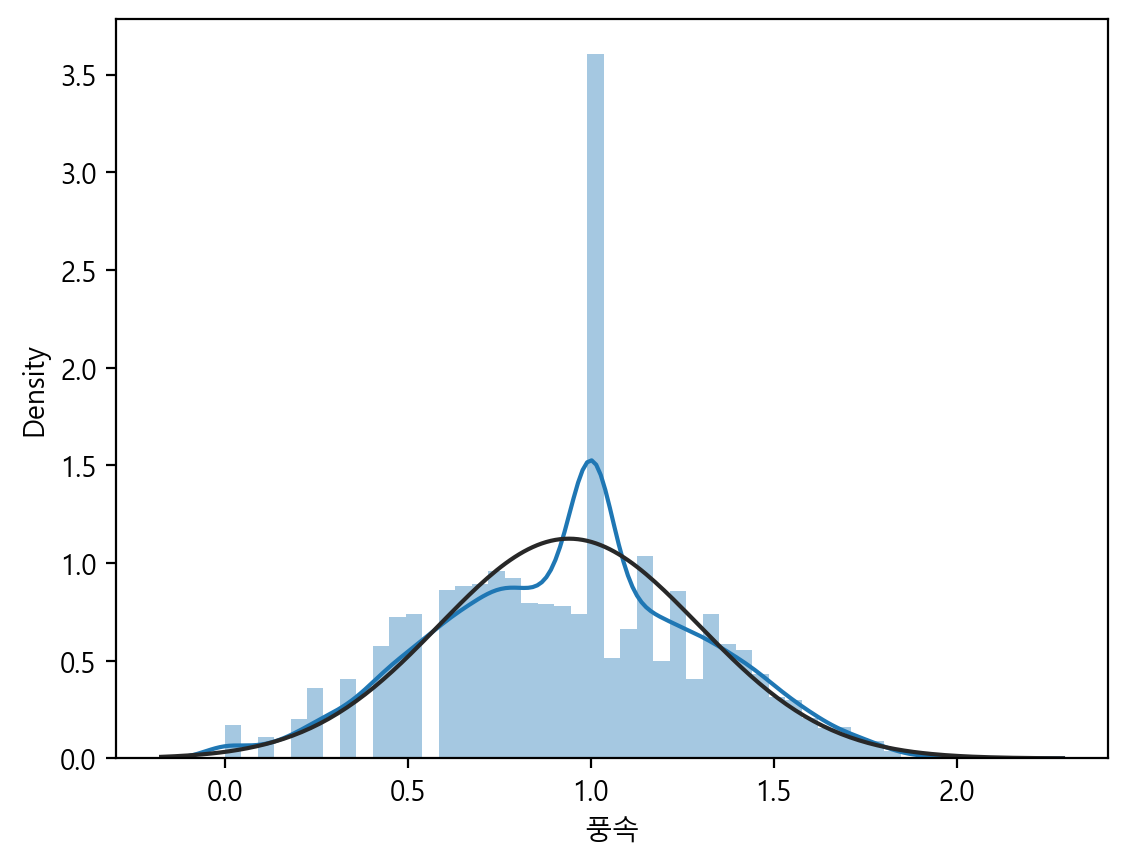

In [394]:
# 로그 변환만
lent_df= new_df.copy()
lent_df['풍속']=np.log1p(lent_df[['풍속']])
lent_df.head()
sns.distplot(lent_df['풍속'], fit=stats.norm)

C:\Users\minye\AppData\Local\Temp\ipykernel_13292\2237717229.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[['풍속']],fit=stats.norm)


<Axes: ylabel='Density'>

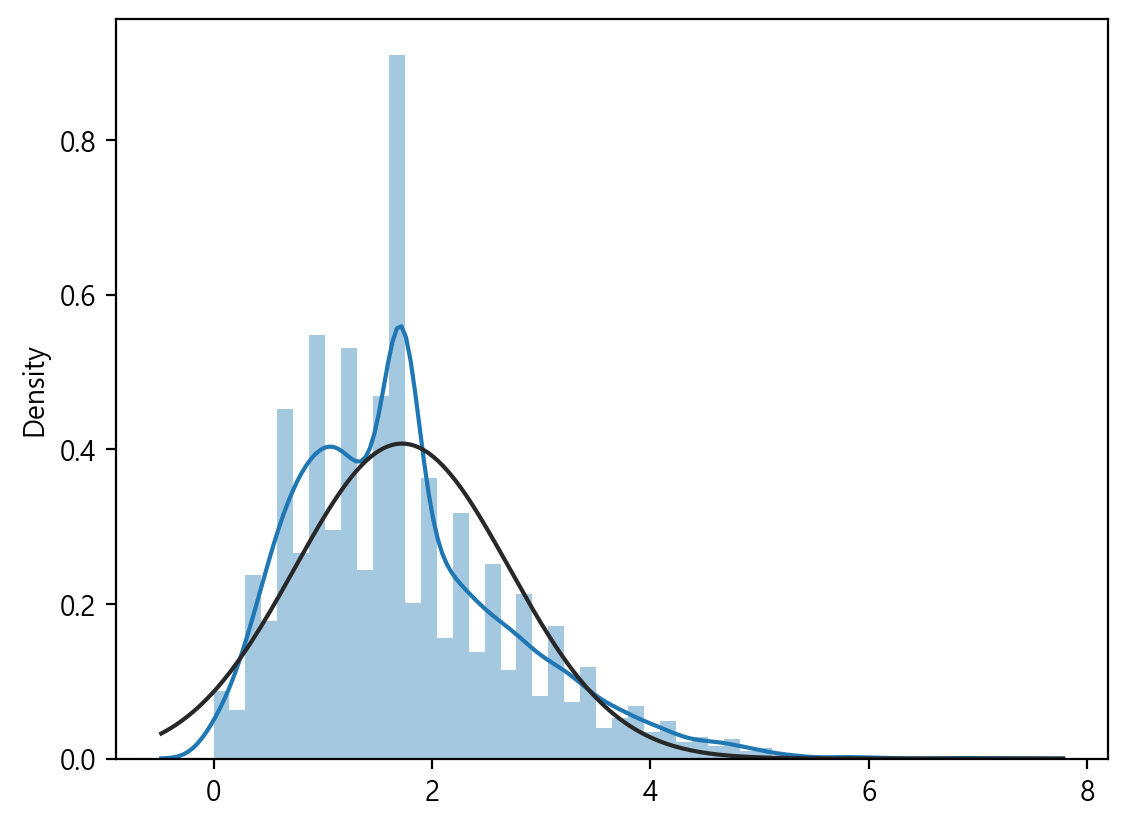

C:\Users\minye\AppData\Local\Temp\ipykernel_13292\2237717229.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lent_df['풍속'], fit=stats.norm)


<Axes: xlabel='풍속', ylabel='Density'>

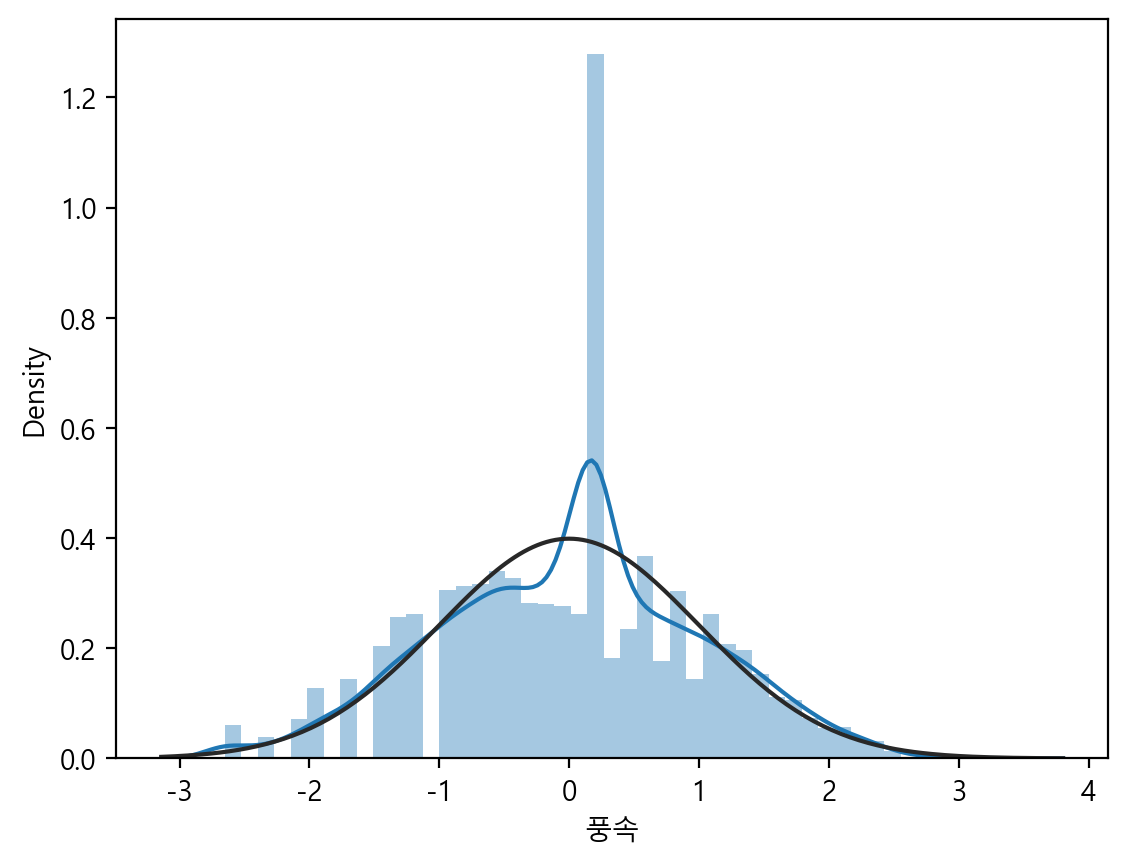

In [395]:
# 로그변환 후 스케일링
lent_df= new_df.copy()
lent_df['풍속']=scaler.fit_transform(np.log1p(lent_df[['풍속']]))

sns.distplot(new_df[['풍속']],fit=stats.norm)
plt.show()
sns.distplot(lent_df['풍속'], fit=stats.norm)

In [396]:
lent_df[['풍속']].sort_values(by='풍속',ascending=False).head(10)
lent_df[['풍속']].sort_values(by='풍속',ascending=False).tail(10)
# 크게 벗어나는 값이 거의 없음

,풍속
3141,3.315472
6316,3.176187
933,3.103877
3140,2.875107
2174,2.835107
1309,2.835107
3139,2.753363
87,2.753363
1724,2.753363
3136,2.753363


,풍속
8018,-2.652264
114,-2.652264
5141,-2.652264
113,-2.652264
5353,-2.652264
1899,-2.652264
6772,-2.652264
8226,-2.652264
8265,-2.652264
5139,-2.652264


### 시정(가시성)에 대한 분포확인 및 전처리

<Axes: >

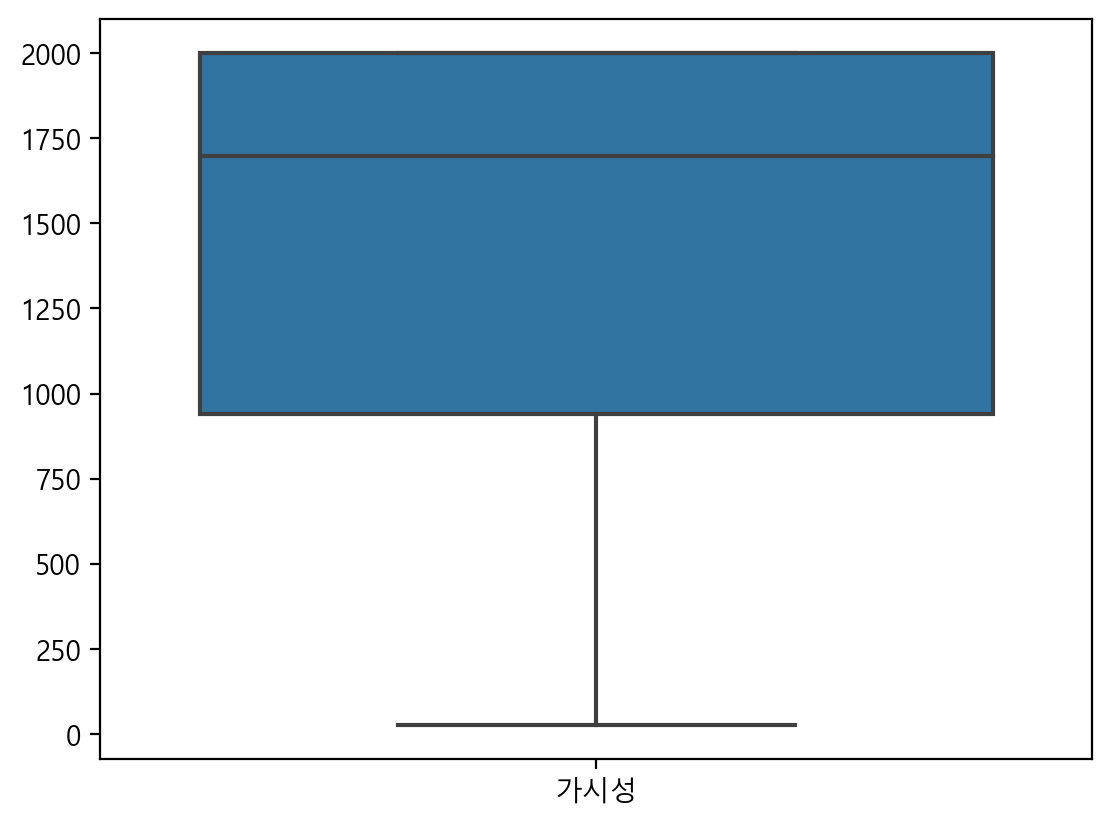

C:\Users\minye\AppData\Local\Temp\ipykernel_13292\2418837683.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[['가시성']], fit=stats.norm)


<Axes: ylabel='Density'>

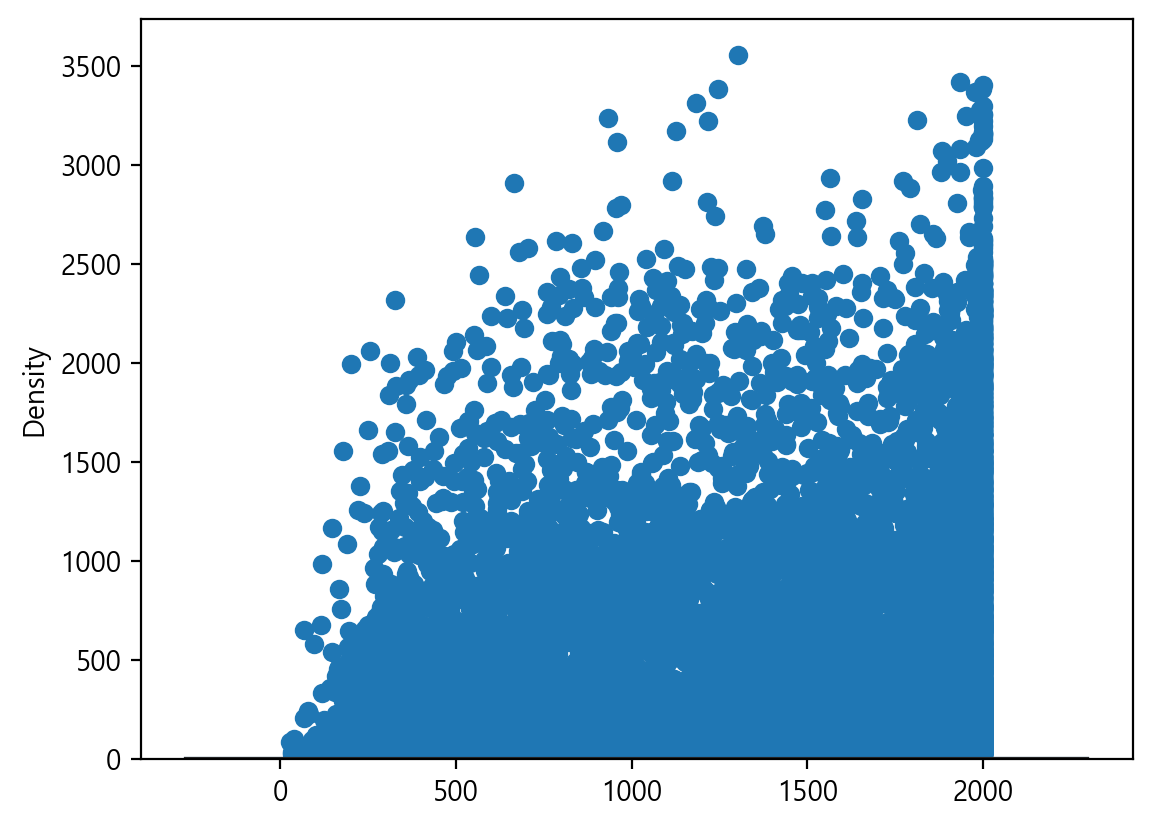

In [397]:
sns.boxplot(new_df[['가시성']])
plt.show()
sns.distplot(new_df[['가시성']], fit=stats.norm)
plt.scatter(new_df['가시성'],new_df['대여횟수'])
# 가시성은 2000을 기준으로 안좋을 수록 내려가기 때문에 
# 2000에 가까워질수록 대여횟수가 늘어남을 확인할 수 있음
# 이상치는 없는 것으로 판단 

In [398]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
new_df_v=new_df.copy()
new_df_v[['시정_min_max']]= minmax_scaler.fit_transform(new_df[['가시성']])
new_df_v[['시정_sc']]= scaler.fit_transform(new_df[['가시성']])
new_df_v[['시정log']]=np.log1p(new_df[['가시성']])
new_df_v[['시정_sc_log']]=scaler.fit_transform(np.log1p(new_df[['가시성']]))


<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

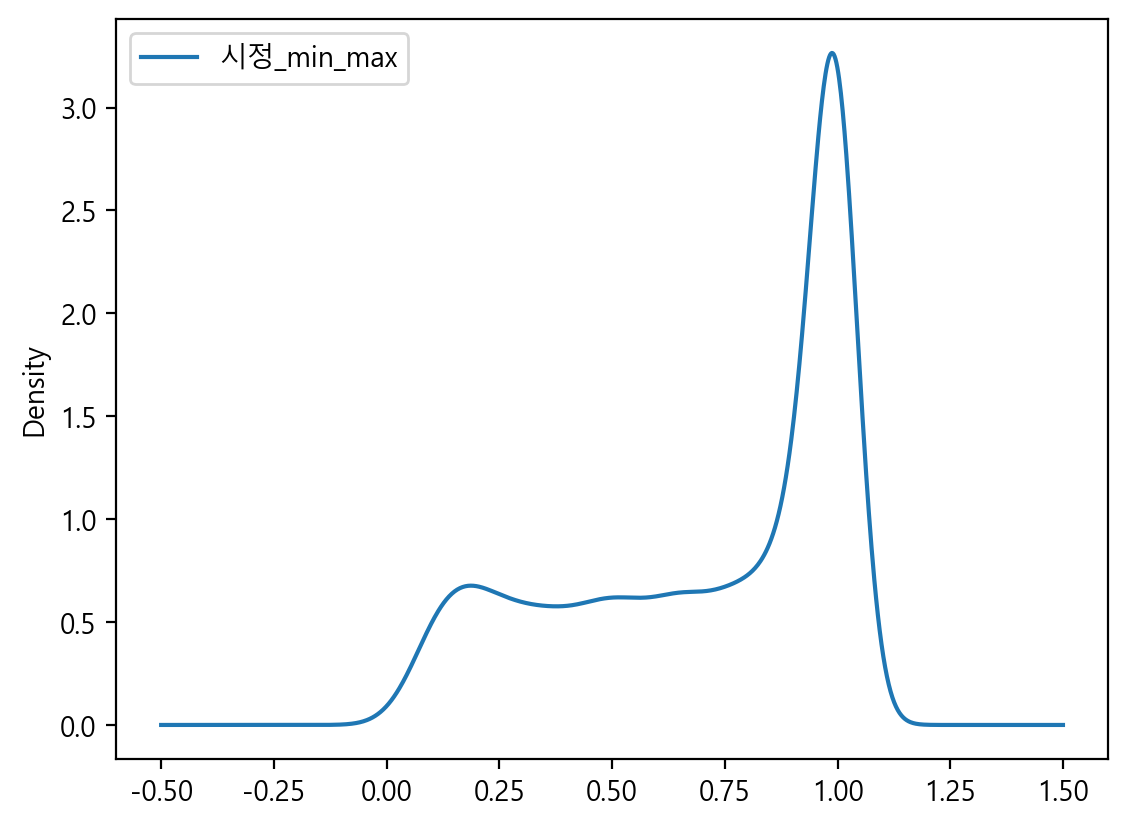

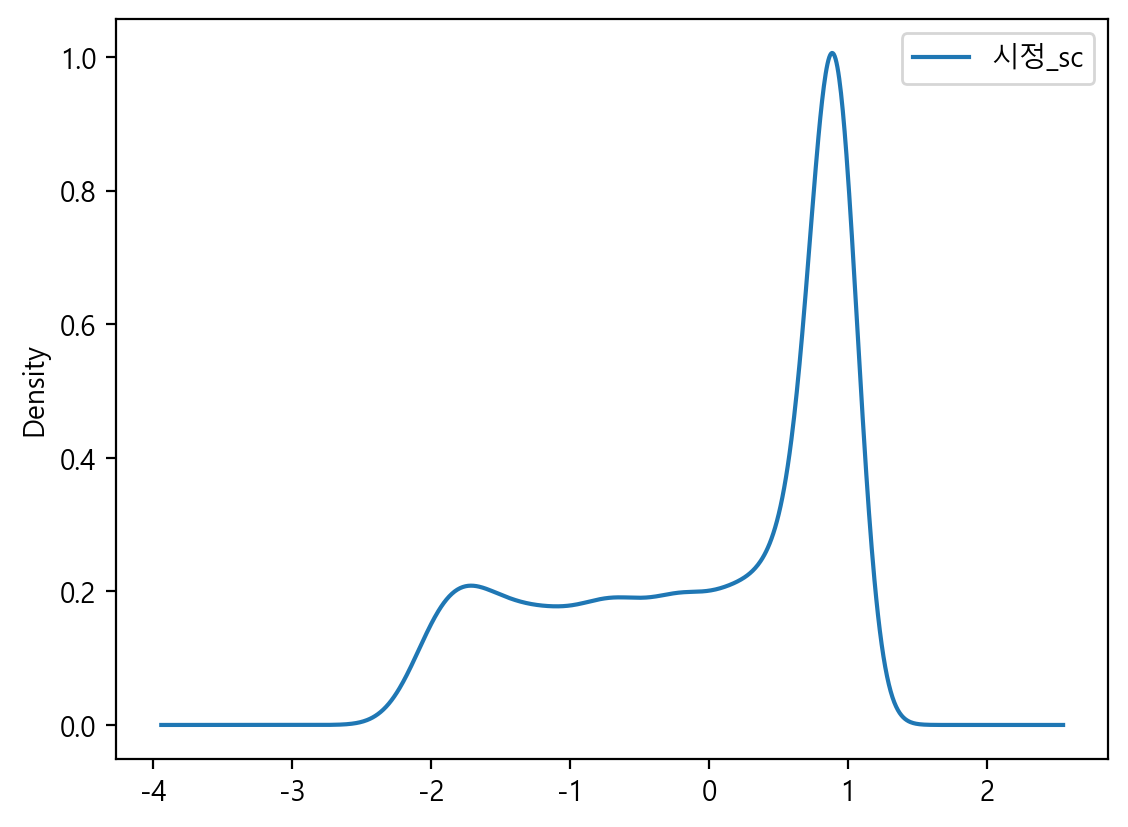

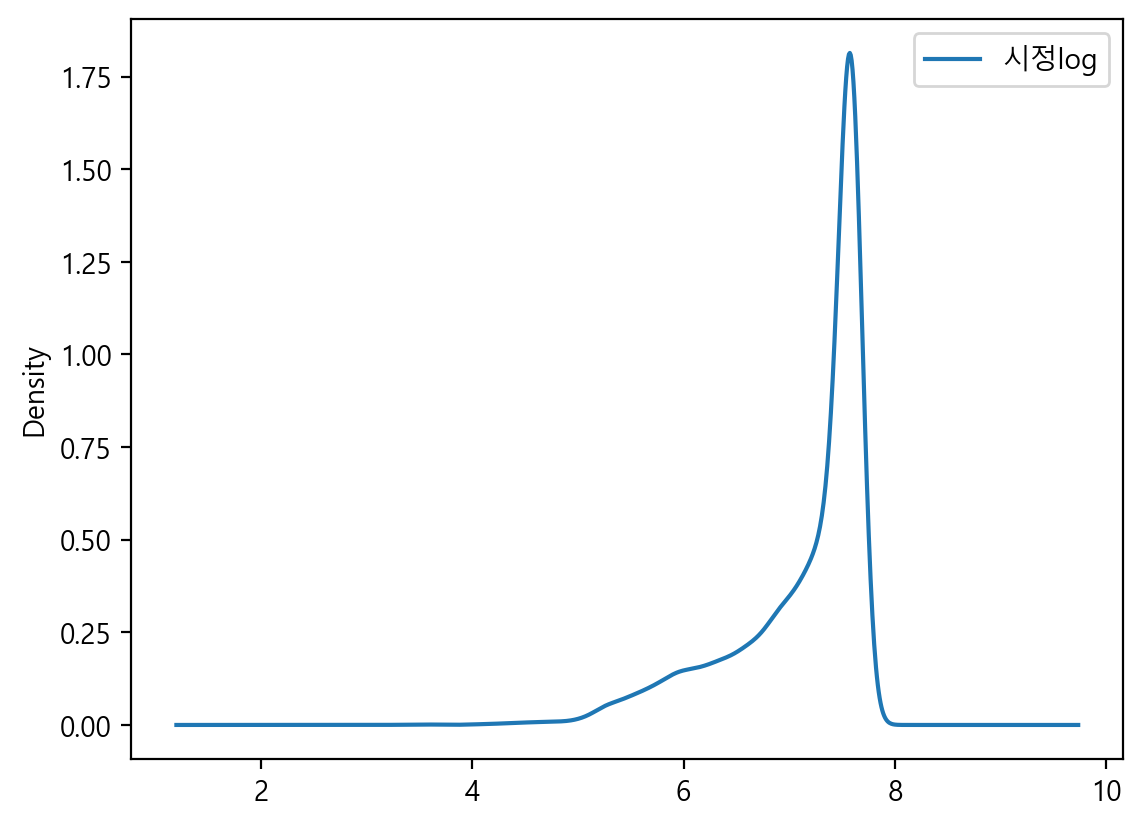

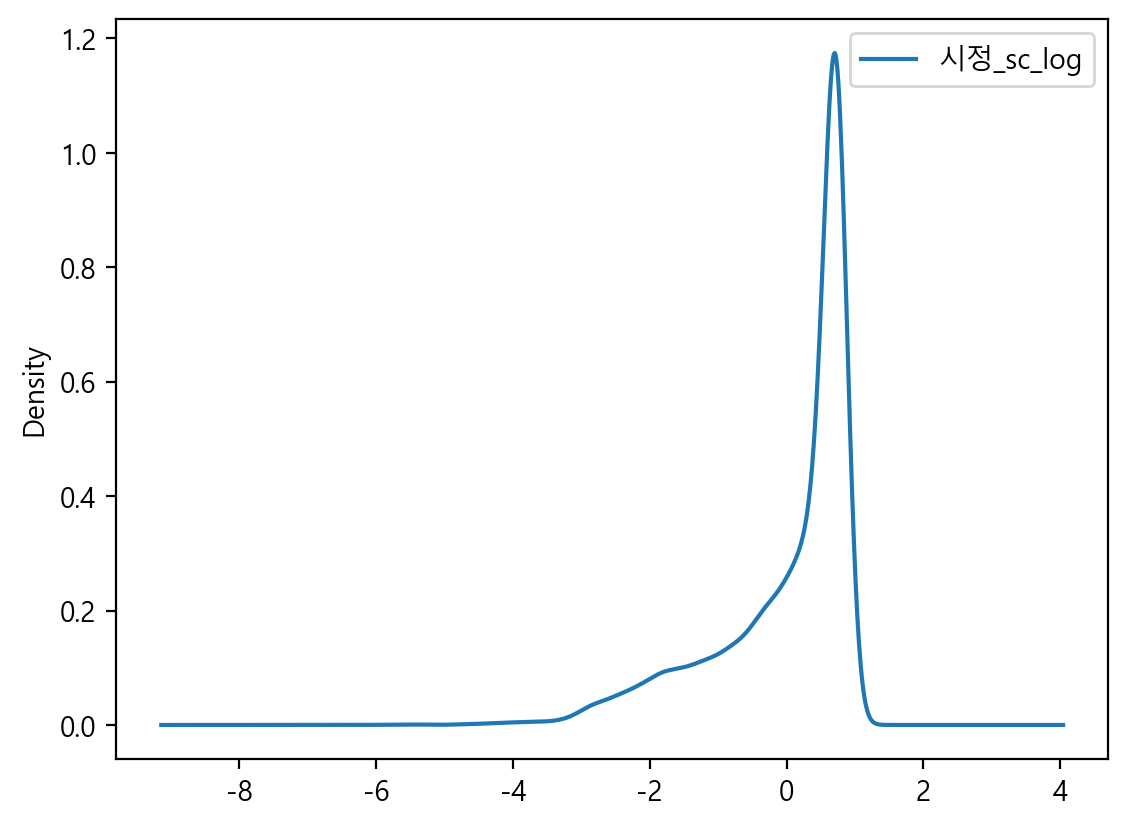

In [399]:
new_df_v[['시정_min_max']].plot.kde()
new_df_v[['시정_sc']].plot.kde()
new_df_v[['시정log']].plot.kde()
new_df_v[['시정_sc_log']].plot.kde()


## 카테고리 변수 변환
### - 계절, 작동일, 휴무일

In [406]:
x_df = df.select_dtypes(include=['object']).columns
new_df_ob = df[x_df]
new_df_ob.shape

(8760, 3)

In [408]:
new_df_ob.isna().sum()

계절       0
휴무일여부    0
작동여부     0
dtype: int64

In [409]:
import numpy as np
# 계절 휴무여부 작동여부 모두 원핫 인코딩 변환 
new_df_ob['계절'].describe()
new_df_ob['휴무일여부'].describe()
new_df_ob['작동여부'].describe()

count       8760
unique         4
top       Winter
freq        2811
Name: 계절, dtype: object

count           8760
unique             2
top       No Holiday
freq            8328
Name: 휴무일여부, dtype: object

count     8760
unique       2
top        Yes
freq      8465
Name: 작동여부, dtype: object

In [410]:
weather_df=pd.get_dummies(new_df_ob['계절'],dtype=int,prefix="weather")
weather_df
holiday_df=pd.get_dummies(new_df_ob['휴무일여부'],dtype=int)
holiday_df
work_df=pd.get_dummies(new_df_ob['작동여부'],dtype=int,prefix="working")
work_df

,weather_Autumn,weather_Spring,weather_Summer,weather_Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8755,0,0,0,1
8756,1,0,0,0
8757,1,0,0,0
8758,1,0,0,0


,Holiday,No Holiday
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8755,0,1
8756,0,1
8757,0,1
8758,0,1


,working_No,working_Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8755,0,1
8756,0,1
8757,0,1
8758,0,1


## 최종

In [411]:
final_df= pd.concat((weather_df,holiday_df,work_df,new_df),axis=1)

In [412]:
final_df=final_df.drop([5034], axis=0)
final_df=final_df.drop([3138,3134], axis=0)
final_df=final_df.drop(final_df[final_df['대여횟수']==0].index,axis=0)
final_df['대여횟수']=scaler.fit_transform(np.log1p(final_df[['대여횟수']]))
final_df['풍속']=scaler.fit_transform(np.log1p(final_df[['풍속']]))
final_df[['시정']]=scaler.fit_transform(np.log1p(final_df[['가시성']]))


In [414]:
final_df.isna().sum()
final_df.head()

weather_Autumn    0
weather_Spring    0
weather_Summer    0
weather_Winter    0
Holiday           0
No Holiday        0
working_No        0
working_Yes       0
대여횟수              0
시                 0
온도                0
습도                0
풍속                0
가시성               0
이슬점               0
태양 복사에너지          0
강수량               0
강설량               0
시정                0
dtype: int64

,weather_Autumn,weather_Spring,weather_Summer,weather_Winter,Holiday,No Holiday,working_No,working_Yes,대여횟수,시,온도,습도,풍속,가시성,이슬점,태양 복사에너지,강수량,강설량,시정
0,0,0,0,1,0,1,0,1,-0.477710,0.0,-5.2,37.0,0.627906,2000.0,-17.6,0.0,0.0,0.0,0.748462
1,0,0,0,1,0,1,0,1,-0.666882,1.0,-5.5,38.0,-0.998325,2000.0,-17.6,0.0,0.0,0.0,0.748462
2,0,0,0,1,0,1,0,1,-0.808990,2.0,-6.0,39.0,-0.700530,2000.0,-17.7,0.0,0.0,0.0,0.748462
3,0,0,0,1,0,1,0,1,-1.222365,3.0,-6.2,40.0,-0.845508,2000.0,-17.6,0.0,0.0,0.0,0.748462
4,0,0,0,1,0,1,0,1,-1.493385,4.0,-6.0,36.0,0.176049,2000.0,-18.6,0.0,0.0,0.0,0.748462
